## PAN-CANCER RNA-SEQUENCE ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gc

# This dataset was downloaded from UCI repository
    https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
    
# "This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD"
    Unclear whether data is consolidated from multiple experiments or single - Assuming single experiment so data can be compared across samples
    5 cancers are represented with total 800 samples 
    KIRC (Kidney Renal Clear Cell Carcinoma) marked in gray: 146
    COAD (Colon adenocarcinoma) in purple: 78
    BRCA (Breast invasive carcinoma) in green: 300
    LUAD (Lung adenocarcinoma) in red: 141
    PRAD (Prostate adenocarcinoma) in blue: 136
    The entire transcriptome (RNA content) was analyzed and so 20531 gene signatures are seen
    
# Q from dataset: Are these gene signatures able to classify the cancers?

### Project aims to reduce the dimensionality for easy visualization of cancer clusters based on expression pattern
    

In [2]:
gc.enable()

In [3]:
# url: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq
sc_df = pd.read_csv("data.csv", sep = ',', skiprows = 1, header = None, index_col = False)
# index_col = False is required to get rid of extra column that is created during reading csv. Transpose becomes easy!
sc_df.shape

(801, 20532)

In [4]:
labels = pd.read_csv("labels.csv", sep = ',', skiprows = 1, header = None, index_col = False)
# labels.head()
# labels.shape

In [5]:
sc_df = pd.concat([labels, sc_df], axis = 1)
# sc_df.shape
# sc_df.head()

In [6]:
# Creating column headers with gene #s 
titles = [x for x in range(1, 20535)]
sc_df.columns = titles
# sc_df.head()

In [7]:
sc_df = sc_df.drop(columns = 1)
sc_df = sc_df.drop(columns = 3)

In [8]:
sc_df.head()

2      4         5         6         7          8      9         10     \
0  PRAD    0.0  2.017209  3.265527  5.478487  10.431999    0.0  7.175175   
1  LUAD    0.0  0.592732  1.588421  7.586157   9.623011    0.0  6.816049   
2  PRAD    0.0  3.511759  4.327199  6.881787   9.870730    0.0  6.972130   
3  PRAD    0.0  3.663618  4.507649  6.659068  10.196184    0.0  7.843375   
4  BRCA    0.0  2.655741  2.821547  6.539454   9.738265    0.0  6.566967   

      11     12     ...       20525     20526      20527     20528     20529  \
0  0.591871    0.0  ...    4.926711  8.210257   9.723516  7.220030  9.119813   
1  0.000000    0.0  ...    4.593372  7.323865   9.740931  6.256586  8.381612   
2  0.452595    0.0  ...    5.125213  8.127123  10.908640  5.401607  9.911597   
3  0.434882    0.0  ...    6.076566  8.792959  10.141520  8.942805  9.601208   
4  0.360982    0.0  ...    5.996032  8.891425  10.373790  7.181162  9.846910   

       20530      20531      20532     20533  20534  
0  12.003135   9.650743   8.921326  5.286759    0.0  
1  12.674552  10.517059   9.397854  2.094168    0.0  
2   9.045255   9.788359  10.090470  1.683023    0.0  
3  11.392682   9.694814   9.684365  3.292001    0.0  
4  11.922439   9.217749   9.461191  5.110372    0.0  

[5 rows x 20532 columns]

In [9]:
titles = [x for x in range(0, 20532)]
titles[0] = 'Sample_ID'
sc_df.columns = titles
sc_df.head()

Sample_ID    1         2         3         4          5    6         7  \
0      PRAD  0.0  2.017209  3.265527  5.478487  10.431999  0.0  7.175175   
1      LUAD  0.0  0.592732  1.588421  7.586157   9.623011  0.0  6.816049   
2      PRAD  0.0  3.511759  4.327199  6.881787   9.870730  0.0  6.972130   
3      PRAD  0.0  3.663618  4.507649  6.659068  10.196184  0.0  7.843375   
4      BRCA  0.0  2.655741  2.821547  6.539454   9.738265  0.0  6.566967   

          8    9  ...       20522     20523      20524     20525     20526  \
0  0.591871  0.0  ...    4.926711  8.210257   9.723516  7.220030  9.119813   
1  0.000000  0.0  ...    4.593372  7.323865   9.740931  6.256586  8.381612   
2  0.452595  0.0  ...    5.125213  8.127123  10.908640  5.401607  9.911597   
3  0.434882  0.0  ...    6.076566  8.792959  10.141520  8.942805  9.601208   
4  0.360982  0.0  ...    5.996032  8.891425  10.373790  7.181162  9.846910   

       20527      20528      20529     20530  20531  
0  12.003135   9.650743   8.921326  5.286759    0.0  
1  12.674552  10.517059   9.397854  2.094168    0.0  
2   9.045255   9.788359  10.090470  1.683023    0.0  
3  11.392682   9.694814   9.684365  3.292001    0.0  
4  11.922439   9.217749   9.461191  5.110372    0.0  

[5 rows x 20532 columns]

In [10]:
sc_df.shape
# 800 cells with 20531 dimensions

(801, 20532)

In [11]:
sc_df.groupby('Sample_ID').count()


1      2      3      4      5      6      7      8      9      \
Sample_ID                                                                  
BRCA         300    300    300    300    300    300    300    300    300   
COAD          78     78     78     78     78     78     78     78     78   
KIRC         146    146    146    146    146    146    146    146    146   
LUAD         141    141    141    141    141    141    141    141    141   
PRAD         136    136    136    136    136    136    136    136    136   

           10     ...    20522  20523  20524  20525  20526  20527  20528  \
Sample_ID         ...                                                      
BRCA         300  ...      300    300    300    300    300    300    300   
COAD          78  ...       78     78     78     78     78     78     78   
KIRC         146  ...      146    146    146    146    146    146    146   
LUAD         141  ...      141    141    141    141    141    141    141   
PRAD         136  ...      136    136    136    136    136    136    136   

           20529  20530  20531  
Sample_ID                       
BRCA         300    300    300  
COAD          78     78     78  
KIRC         146    146    146  
LUAD         141    141    141  
PRAD         136    136    136  

[5 rows x 20531 columns]

In [12]:
sc_df.isnull().values.any() # Look for missing data - yay, none missing!

False

In [13]:
# print(labels.info())
del [labels]
gc.collect()

0

In [14]:
# sc_df.info()
# shows how much memory is used for dataset after garbage collection

In [15]:
# Creating X and y variables for model fitting
X = sc_df.drop(["Sample_ID"], axis = 1)
# X.head()
y = sc_df['Sample_ID']
# y.head()

# Preprocessing and PCA modeling to 3 components

In [16]:
from sklearn import preprocessing
scaled_df = preprocessing.scale(X) # Scale dataset before passing to models

In [17]:
pca = PCA(n_components=3) # call an instance of PCA with 3 components

In [18]:
pca.fit(scaled_df) # Fit scaled data to PCA model

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca_data = pca.transform(scaled_df) # since only one dataset (not training and test), transform back to original data

In [20]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) # variance values in percentages
var_labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)] # Prepare labels for the PCA components

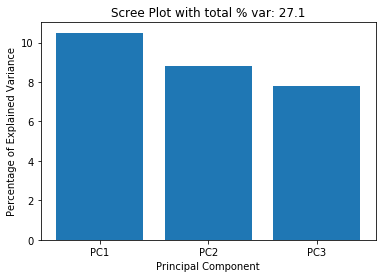

In [21]:
# Scree plot to visualize total variance and contribution of each PC
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = var_labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel('Principal Component')
plt.title('Scree Plot with total % var: ' + str(round(sum(per_var), 2)))
plt.show()

In [22]:
# Create dataframe from PCA reduced data for plotting purposes
pca_df = pd.DataFrame(pca_data.astype(float), index = y, columns = var_labels)
# pca_df.insert(0, [y], True)
# pca_df.head()


In [23]:
# Color coding of the cancers for creating distinguishing plots
colors = []
for sample in pca_df.index:
    if sample == "PRAD":
        colors.append('blue')
    elif sample == "LUAD":
        colors.append('red')
    elif sample == 'BRCA':
        colors.append('green')
    elif sample == "COAD":
        colors.append('purple')
    else:
        colors.append('gray') # gray is the KIRC group
print(len(colors), colors[1:5])

801 ['red', 'blue', 'blue', 'green']


In [24]:
print('KIRC (Kidney Renal Clear Cell Carcinoma) counts marked in gray:', colors.count('gray'))
print('COAD (Colon adenocarcinoma) counts in purple:', colors.count('purple'))
print('BRCA (Breast invasive carcinoma) counts in green:', colors.count('green'))
print('LUAD (Lung adenocarcinoma) counts in red:', colors.count('red'))
print('PRAD (Prostate adenocarcinoma) counts in blue:', colors.count('blue'))
print(146+78+300+141+136)

KIRC (Kidney Renal Clear Cell Carcinoma) counts marked in gray: 146
COAD (Colon adenocarcinoma) counts in purple: 78
BRCA (Breast invasive carcinoma) counts in green: 300
LUAD (Lung adenocarcinoma) counts in red: 141
PRAD (Prostate adenocarcinoma) counts in blue: 136
801


## Visualization of PCA reduced data

[]

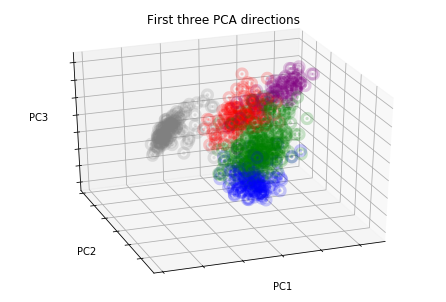

In [25]:
# 3D plot of the PCA reduced data in the 3 PC dimensions
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c = colors, s = 10, cmap=plt.cm.Paired,linewidths=10, alpha = 0.2)
ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])

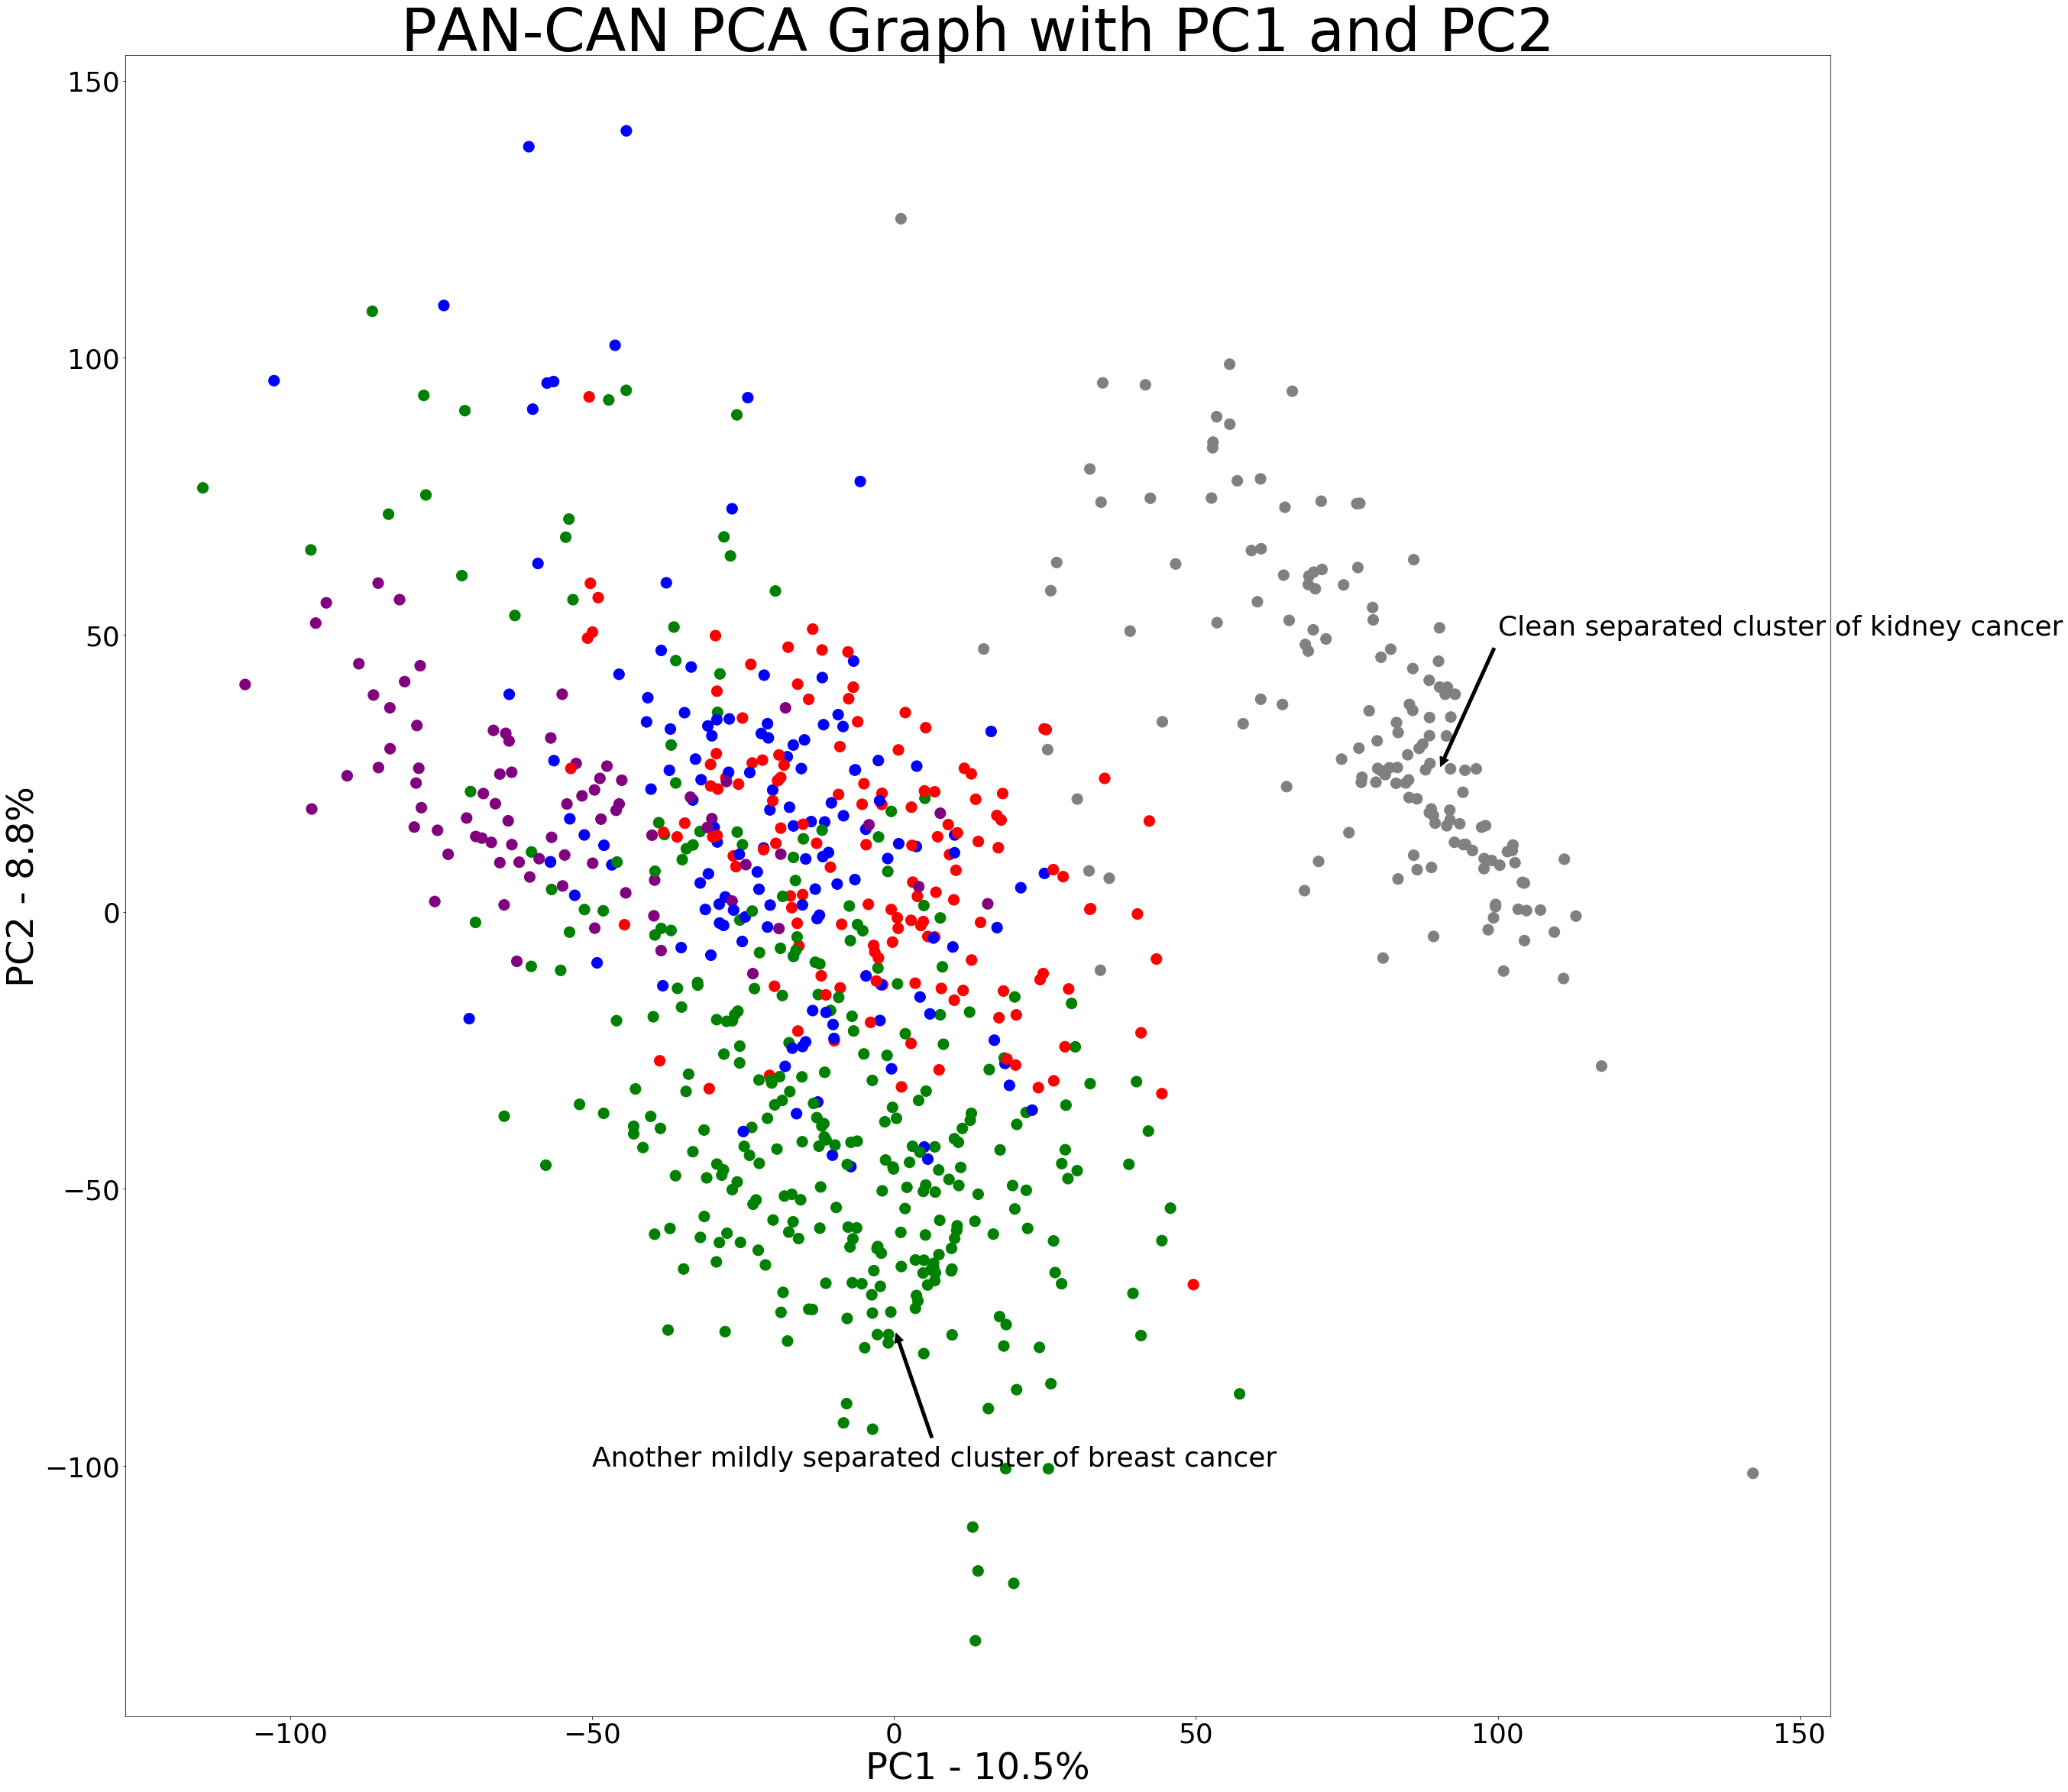

In [26]:
# Scatter plot with first two PC
plt.figure(figsize=(40,40))
plt.scatter(pca_df.PC1, pca_df.PC2, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC1 and PC2", size = 78)
plt.xlabel('PC1 - {0}%'.format(per_var[0]), size = 48)
plt.ylabel('PC2 - {0}%'.format(per_var[1]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of kidney cancer',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Another mildly separated cluster of breast cancer',xy=(0,-75),xytext=(-50,-100),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

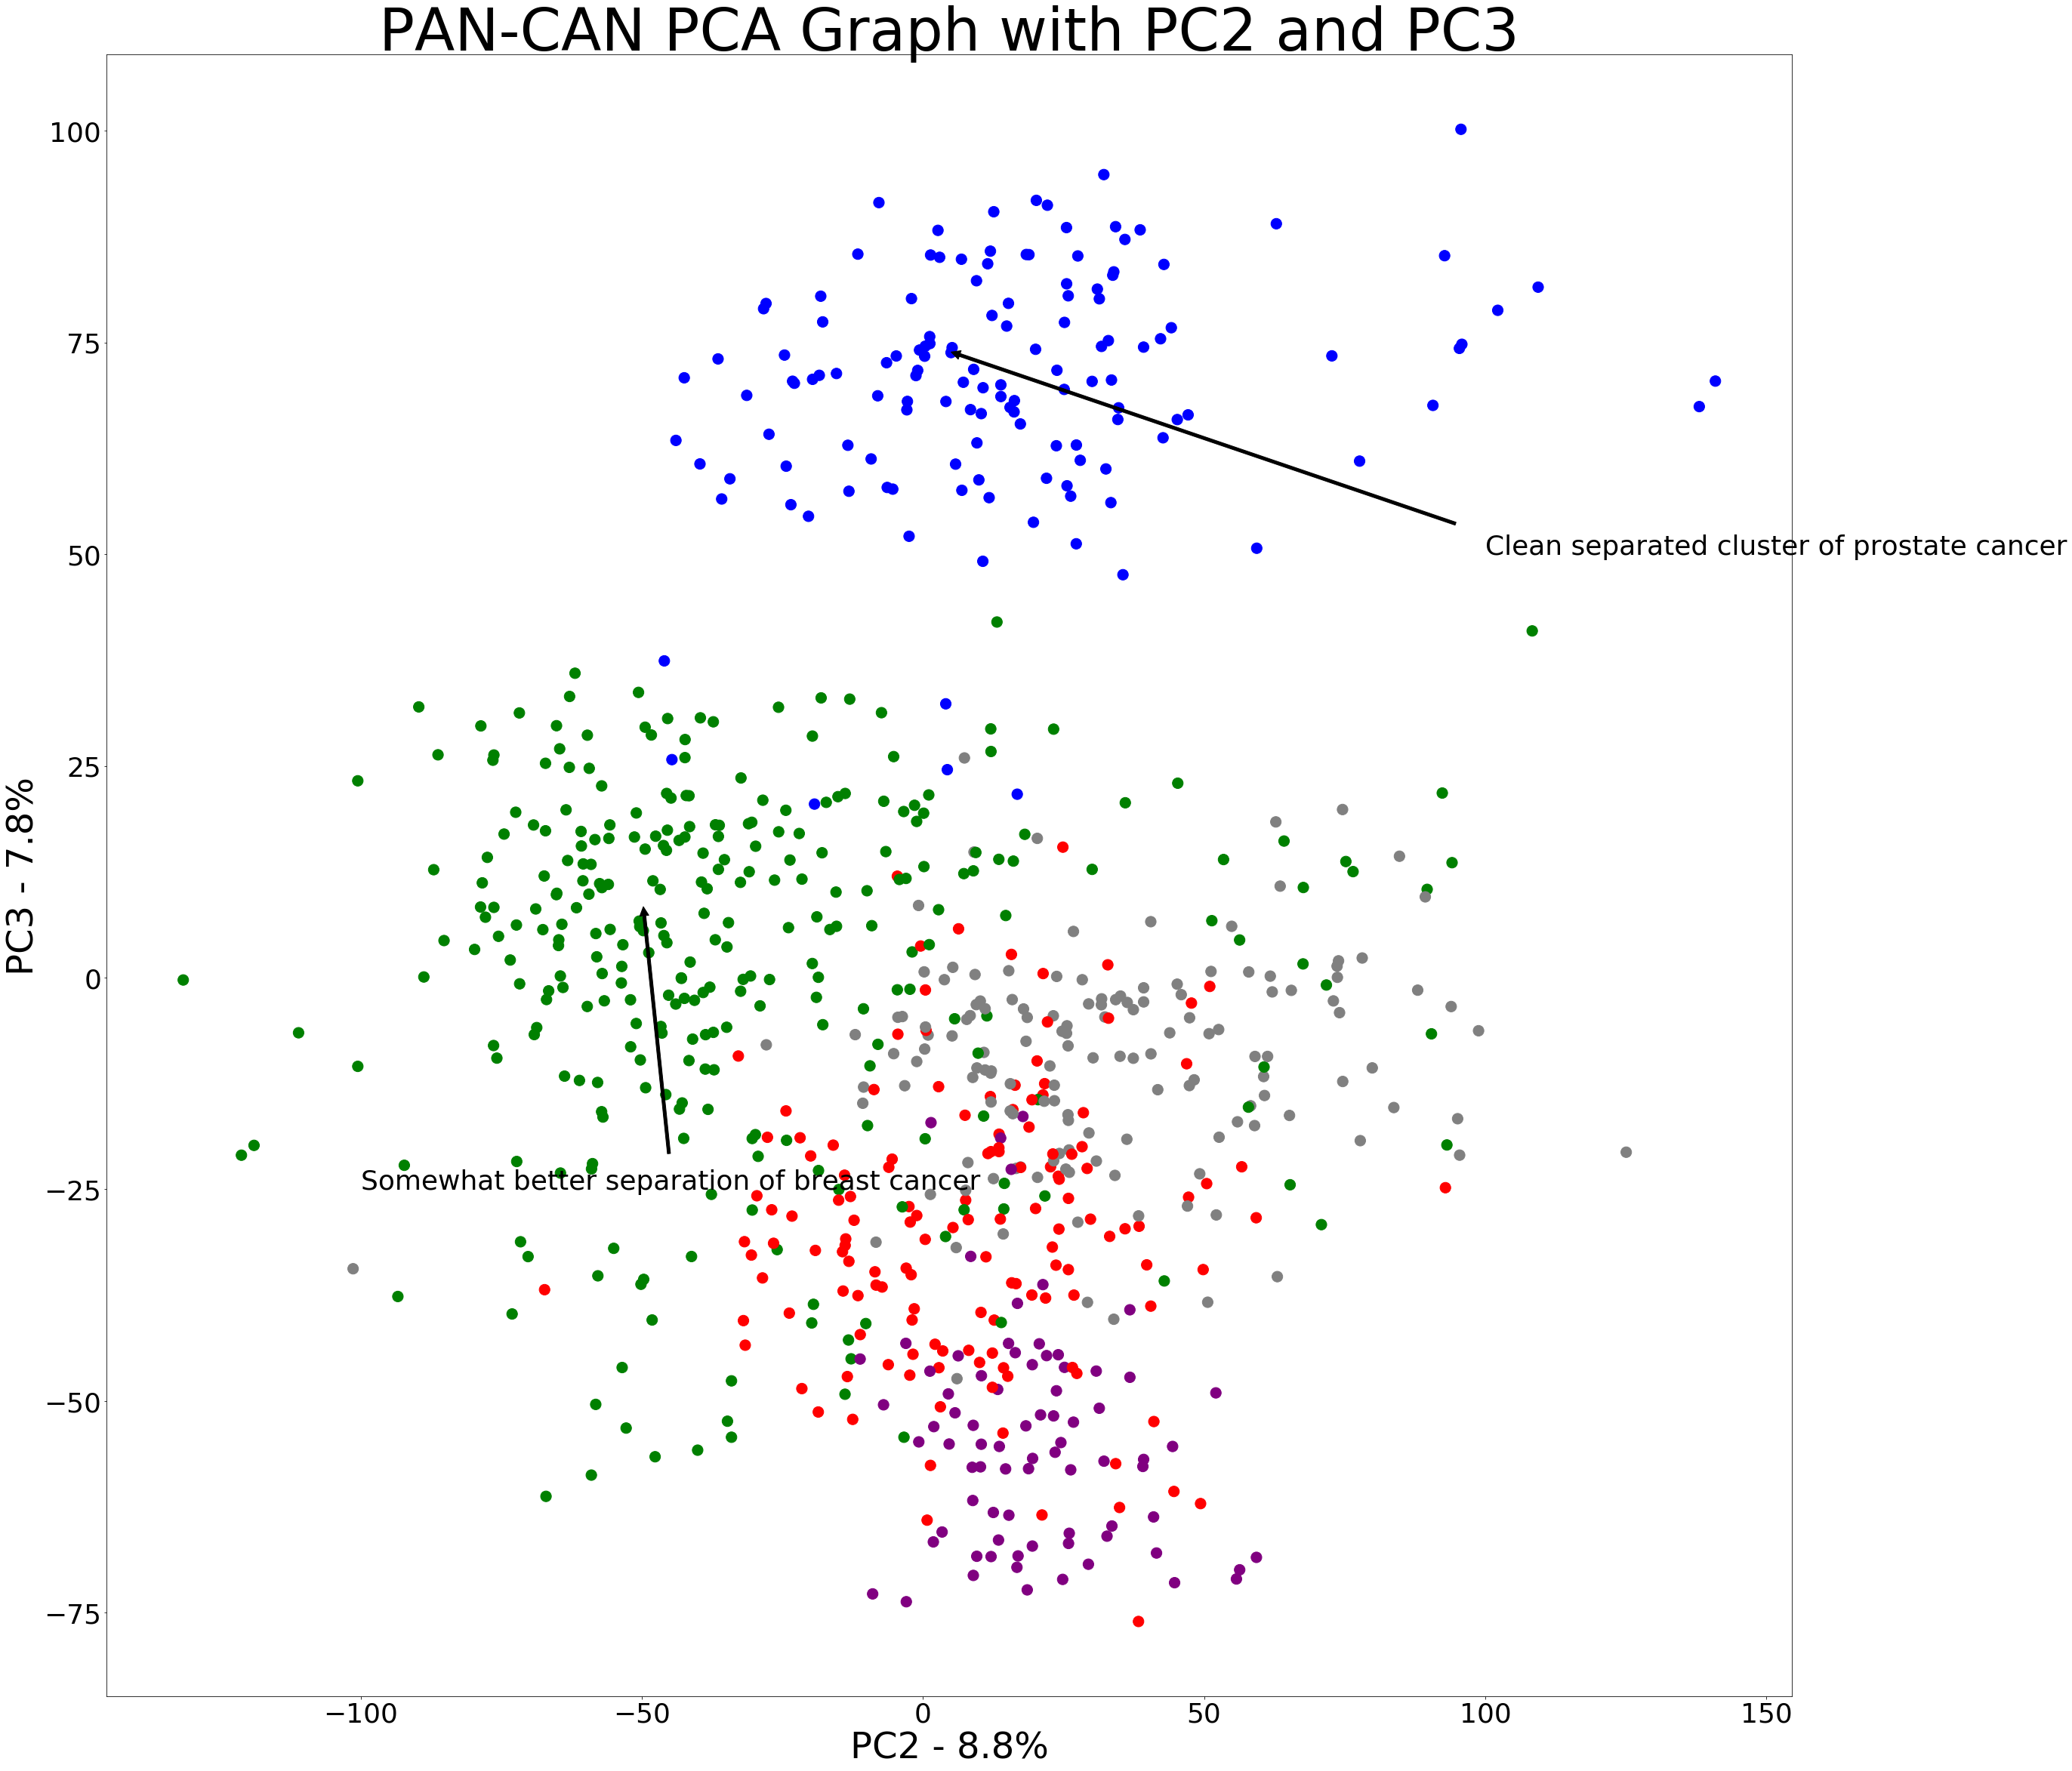

In [27]:
# Scatter plot with first two PC
plt.figure(figsize=(40,40))
plt.scatter(pca_df.PC2, pca_df.PC3, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC2 and PC3", size = 78)
plt.xlabel('PC2 - {0}%'.format(per_var[1]), size = 48)
plt.ylabel('PC3 - {0}%'.format(per_var[2]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of prostate cancer',xy=(0,75),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Somewhat better separation of breast cancer',xy=(-50,10),xytext=(-100,-25),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

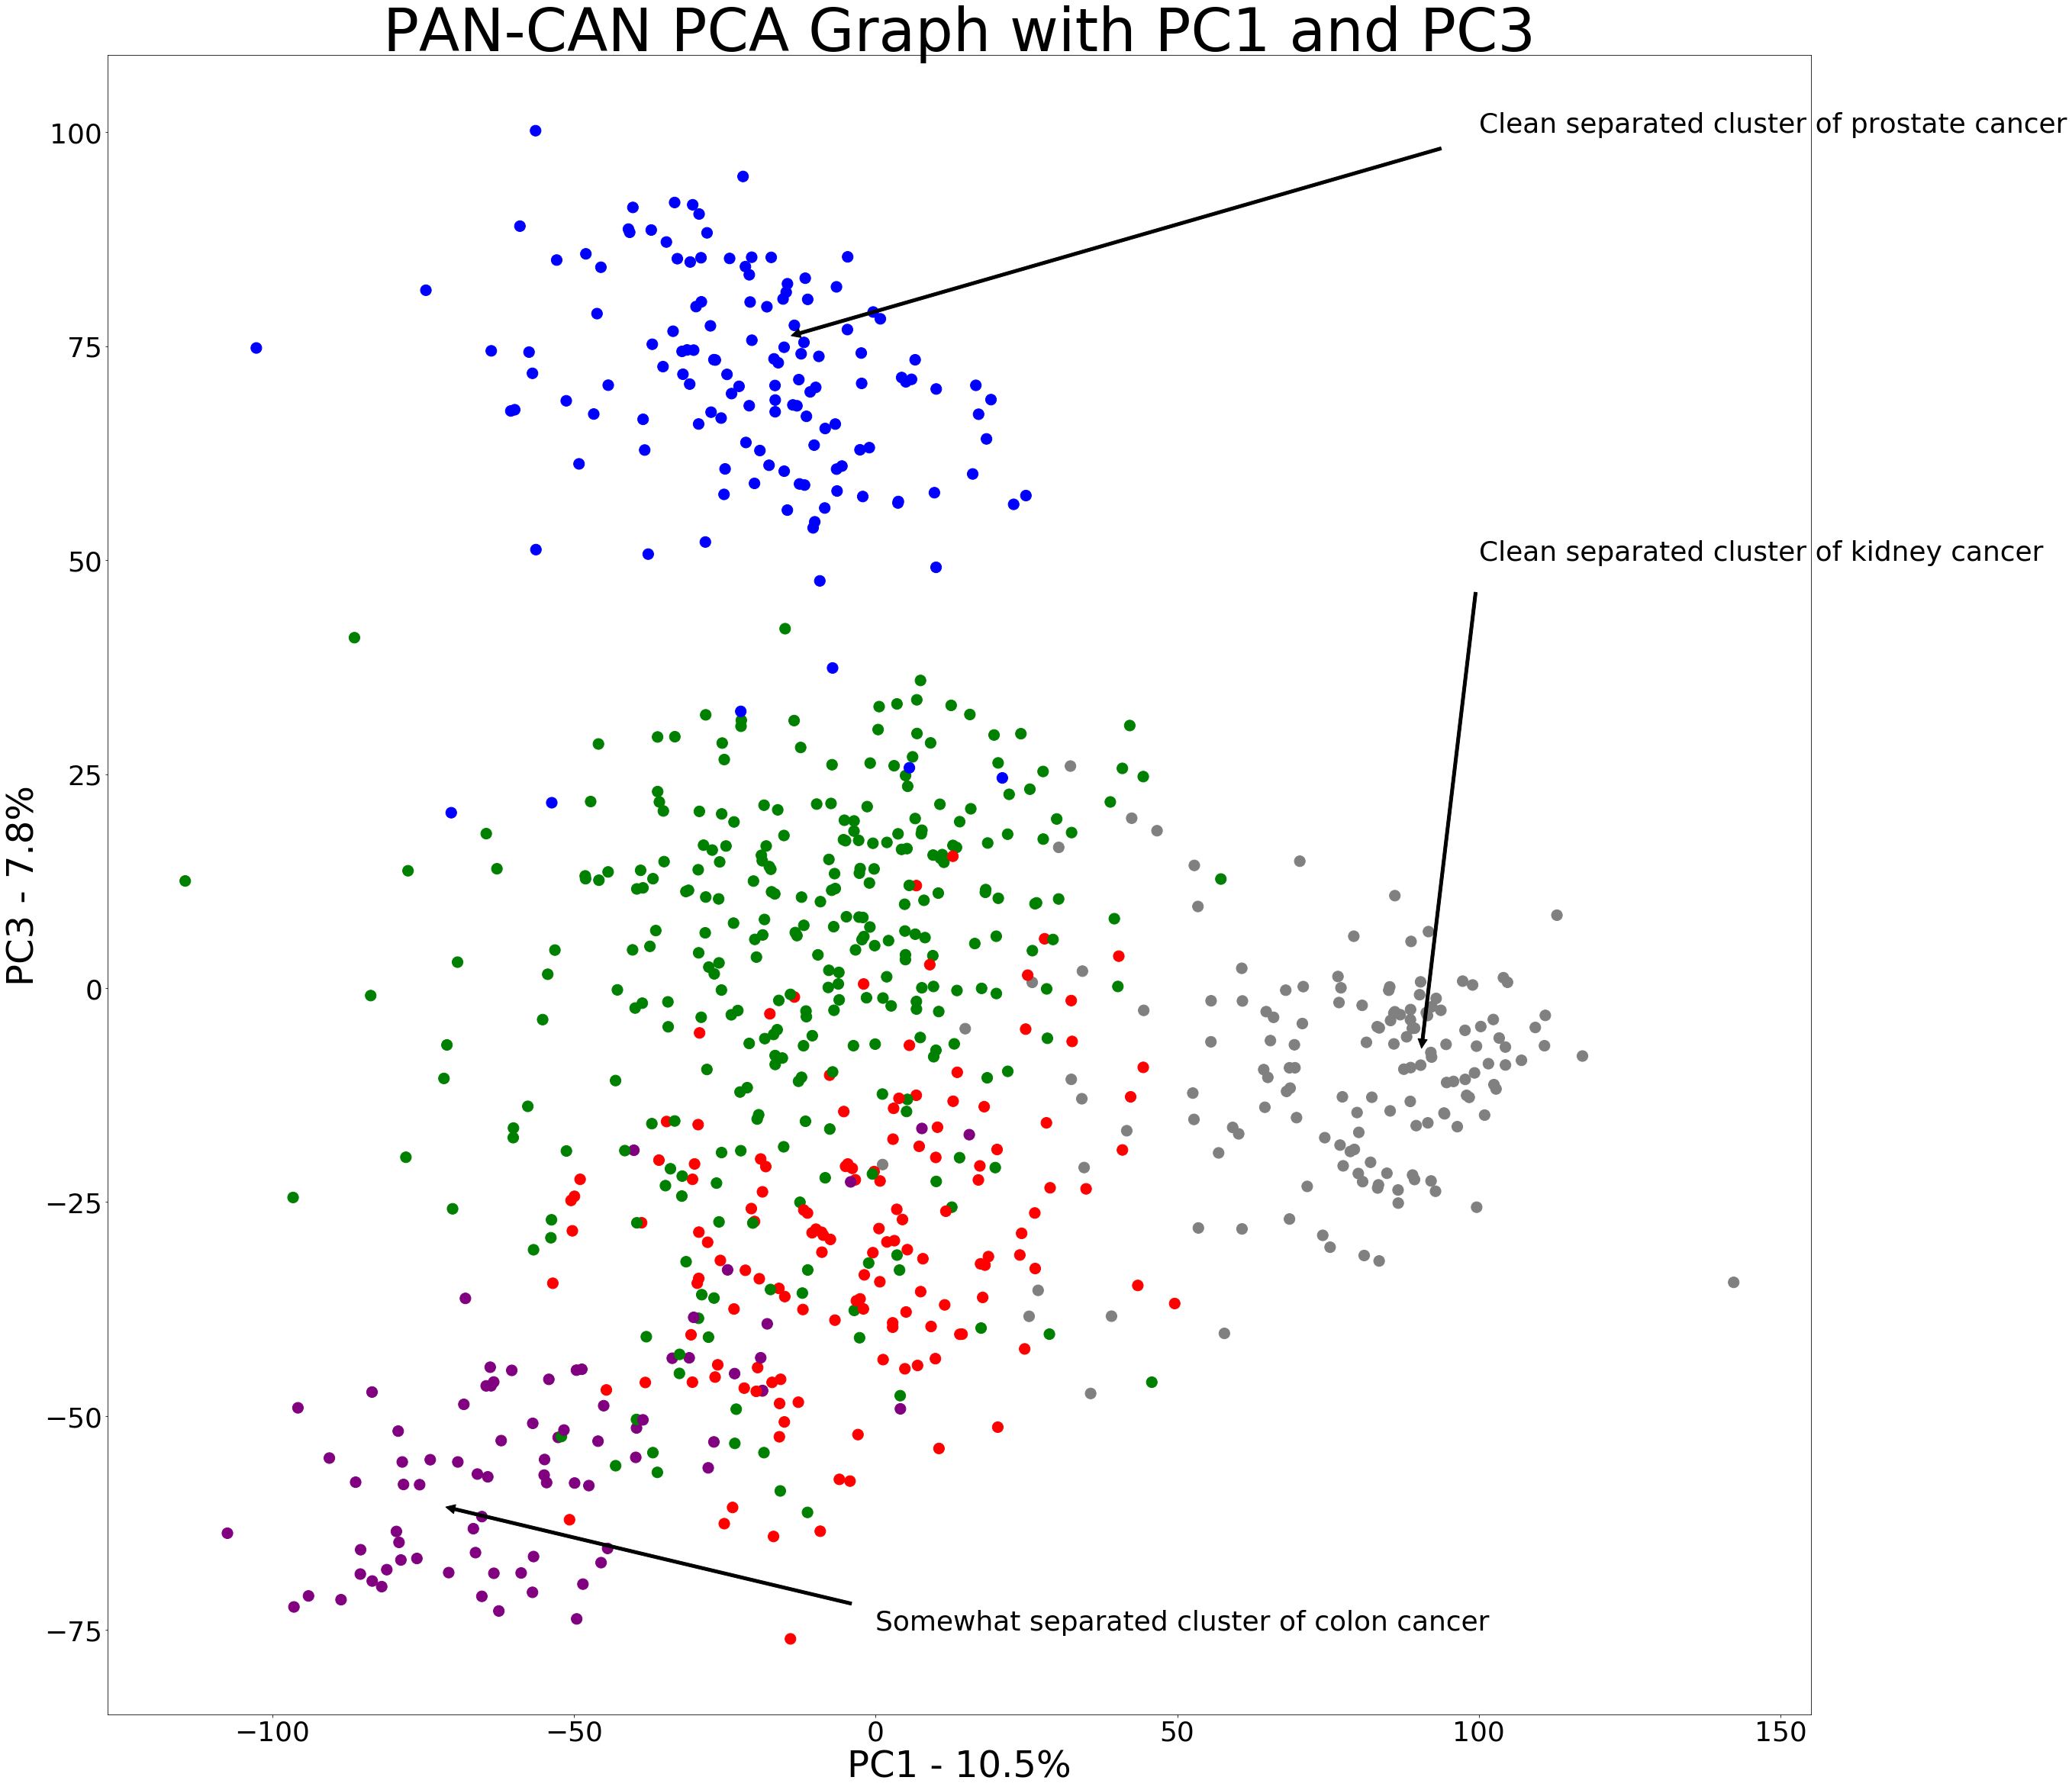

In [28]:
# Scatter plot with first two PC
plt.figure(figsize=(40,40))
plt.scatter(pca_df.PC1, pca_df.PC3, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC1 and PC3", size = 78)
plt.xlabel('PC1 - {0}%'.format(per_var[0]), size = 48)
plt.ylabel('PC3 - {0}%'.format(per_var[2]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of kidney cancer',xy=(90,-10),xytext=(100,50),size=36, 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Clean separated cluster of prostate cancer',xy=(-20,75),xytext=(100,100),size=36, 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Somewhat separated cluster of colon cancer',xy=(-75,-60),xytext=(0,-75),size=36, 
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [29]:
loading_scores = pd.Series(pca.components_[0], index = titles[1:20533])
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
top_10_genes = sorted_loading_scores[0:10].index.values
print("Top 10 genes in PC1 with scores:", "\n", loading_scores[top_10_genes])

# which genes impacted highly the separation of clusters? All relatively similar contributions

Top 10 genes in PC1 with scores: 
 19863    0.019002
17361    0.018985
13490    0.018966
15159    0.018777
7032     0.018740
7020     0.018657
10789    0.018629
13508   -0.018624
6544     0.018595
2289    -0.018592
dtype: float64


In [30]:
bottom_10_genes = sorted_loading_scores[20521:20532].index.values
bottom_10_genes

array([16822, 16833, 16823, 16824, 16825, 16827, 16828, 16831, 16832,
       16909])

[]

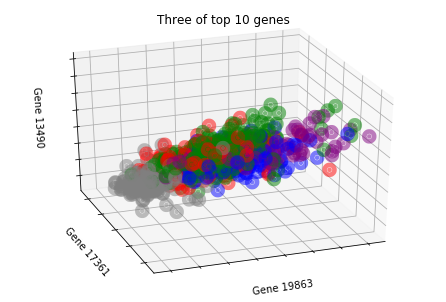

In [31]:
# Separation of clusters by top genes and bottom genes

plt.clf()
fig = plt.figure(1)
figsize=(200,200)
ax = Axes3D(fig, elev=-150, azim=110,)

ax.scatter(sc_df[19863], sc_df[17361], sc_df[13490], c = colors, cmap=plt.cm.Paired,linewidths=10, alpha = 0.5)
ax.set_title("Three of top 10 genes")
ax.set_xlabel("Gene 19863")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Gene 17361")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Gene 13490")
ax.w_zaxis.set_ticklabels([])

[]

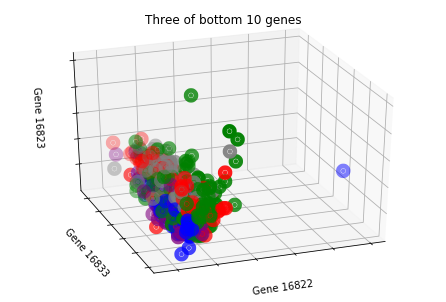

In [32]:
plt.clf()
fig = plt.figure(1)
figsize=(200,200)
ax = Axes3D(fig, elev=-150, azim=110,)

ax.scatter(sc_df[51], sc_df[50], sc_df[49], c = colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("Three of bottom 10 genes")
ax.set_xlabel("Gene 16822")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Gene 16833")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Gene 16823")
ax.w_zaxis.set_ticklabels([])

In [33]:
"""print('Gene', 'Expression value')
for gene in sorted(top_10_genes):
    print(gene, round(sc_df[gene].sum(), 2))"""

# Potential biomarkers!? - for KIRC

"print('Gene', 'Expression value')\nfor gene in sorted(top_10_genes):\n    print(gene, round(sc_df[gene].sum(), 2))"

In [34]:
"""print('Gene', 'Expression value')
for gene in sorted(bottom_10_genes):
    print(gene, sc_df[gene].sum())"""

"print('Gene', 'Expression value')\nfor gene in sorted(bottom_10_genes):\n    print(gene, sc_df[gene].sum())"

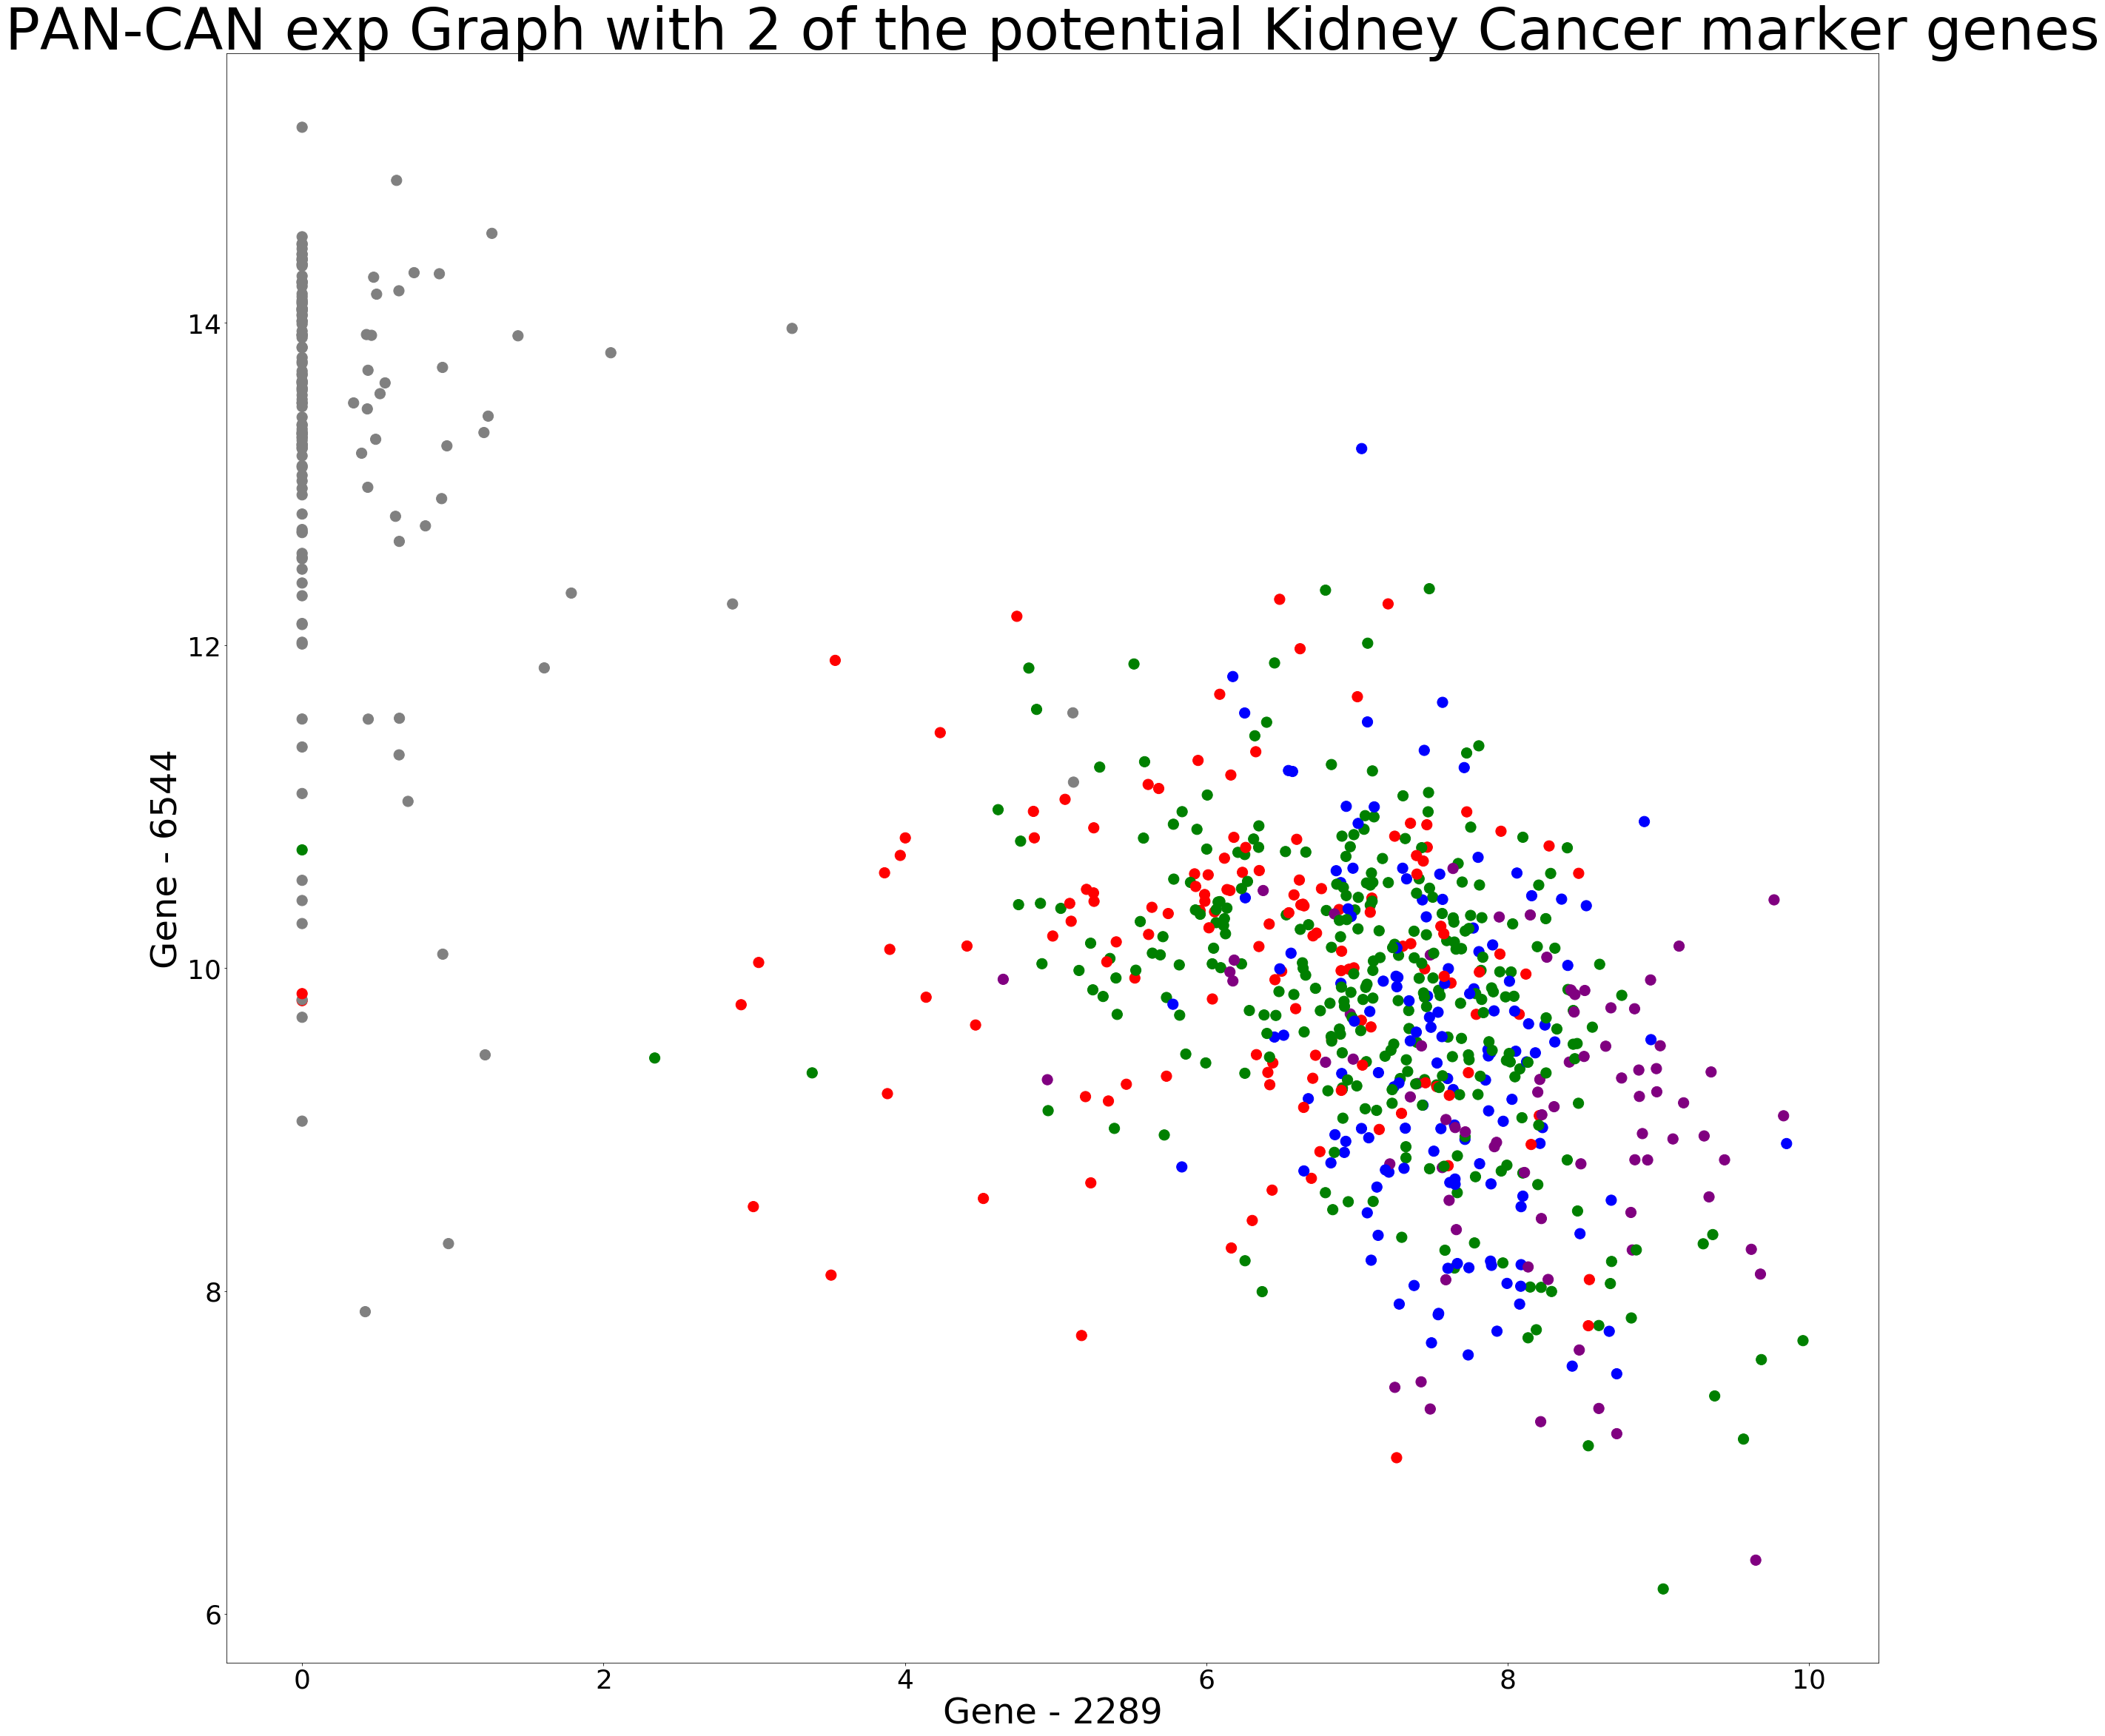

In [35]:
# Expression profile with specific gene pairs
plt.figure(figsize=(40,40))
plt.scatter(sc_df[2289], sc_df[6544], c = colors, s = 200)
plt.title("PAN-CAN exp Graph with 2 of the potential Kidney Cancer marker genes", size = 78)
plt.xlabel('Gene - 2289', size = 48)
plt.ylabel('Gene - 6544', size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
#plt.annotate('See this separated cluster',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

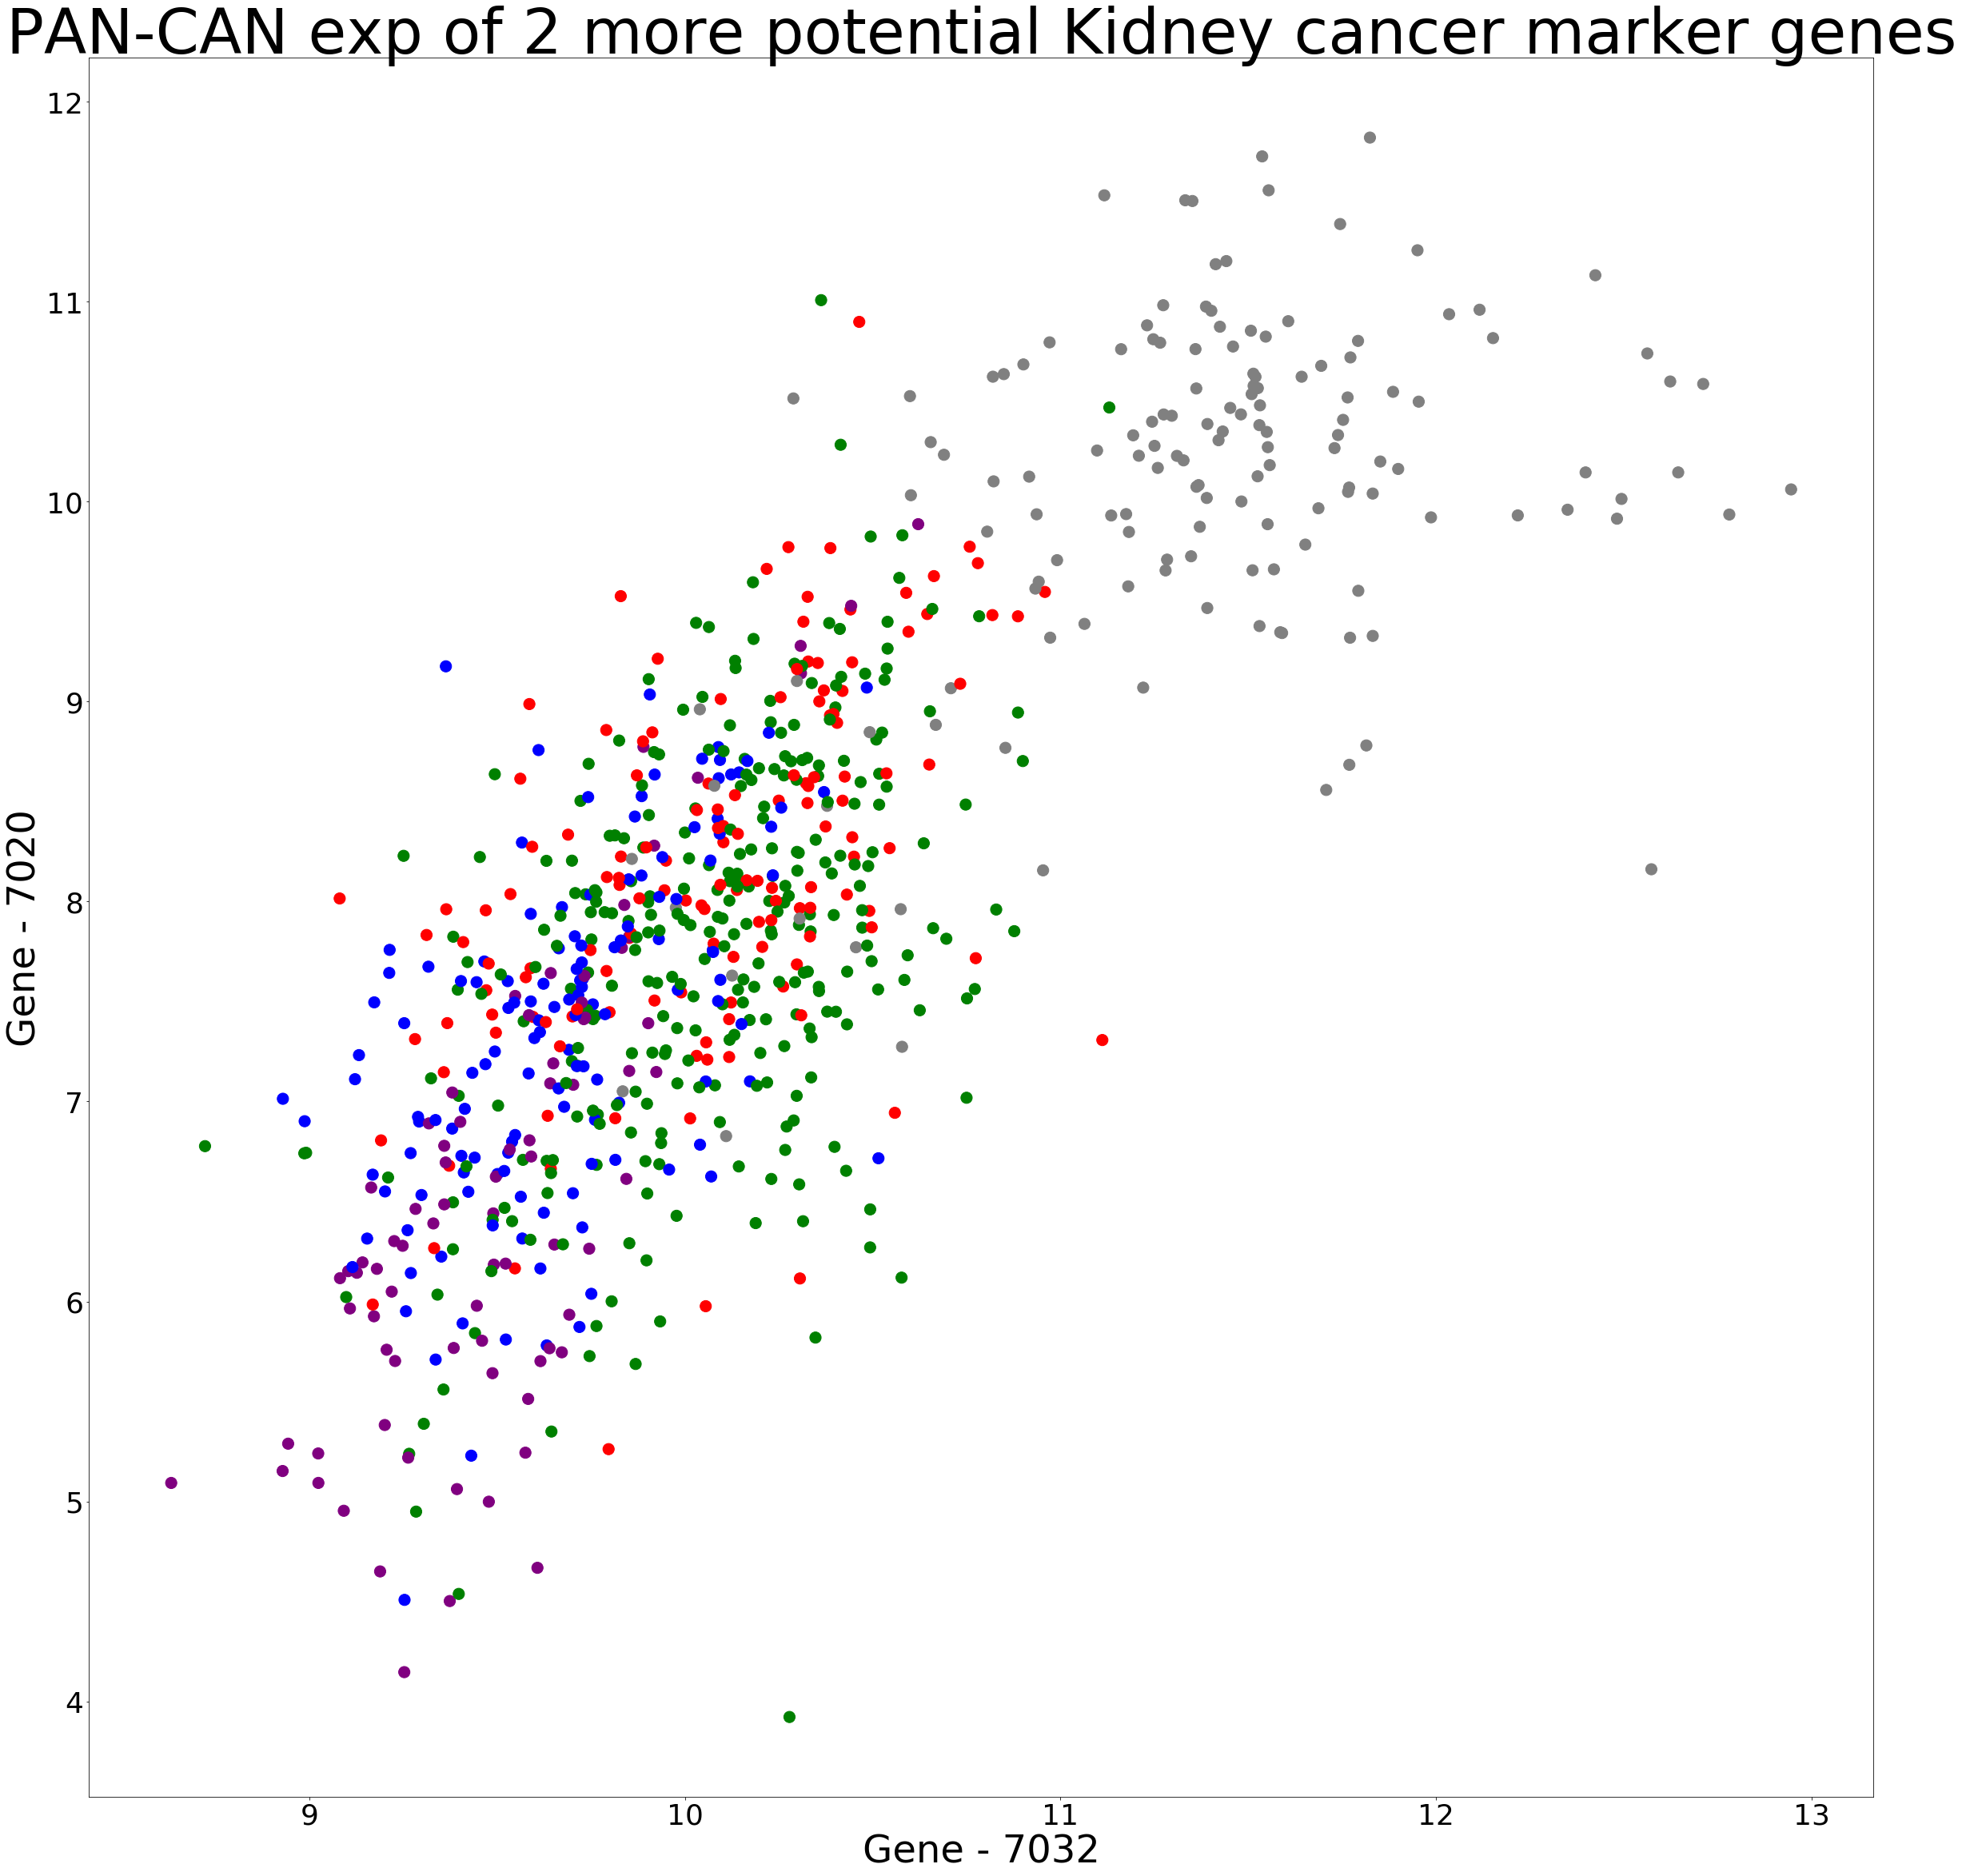

In [36]:
# Expression profile of specific gene pairs
plt.figure(figsize=(40,40))
plt.scatter(sc_df[7032], sc_df[7020], c = colors, s = 200)
plt.title("PAN-CAN exp of 2 more potential Kidney cancer marker genes", size = 78)
plt.xlabel('Gene - 7032', size = 48)
plt.ylabel('Gene - 7020', size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
#plt.annotate('See this separated cluster',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

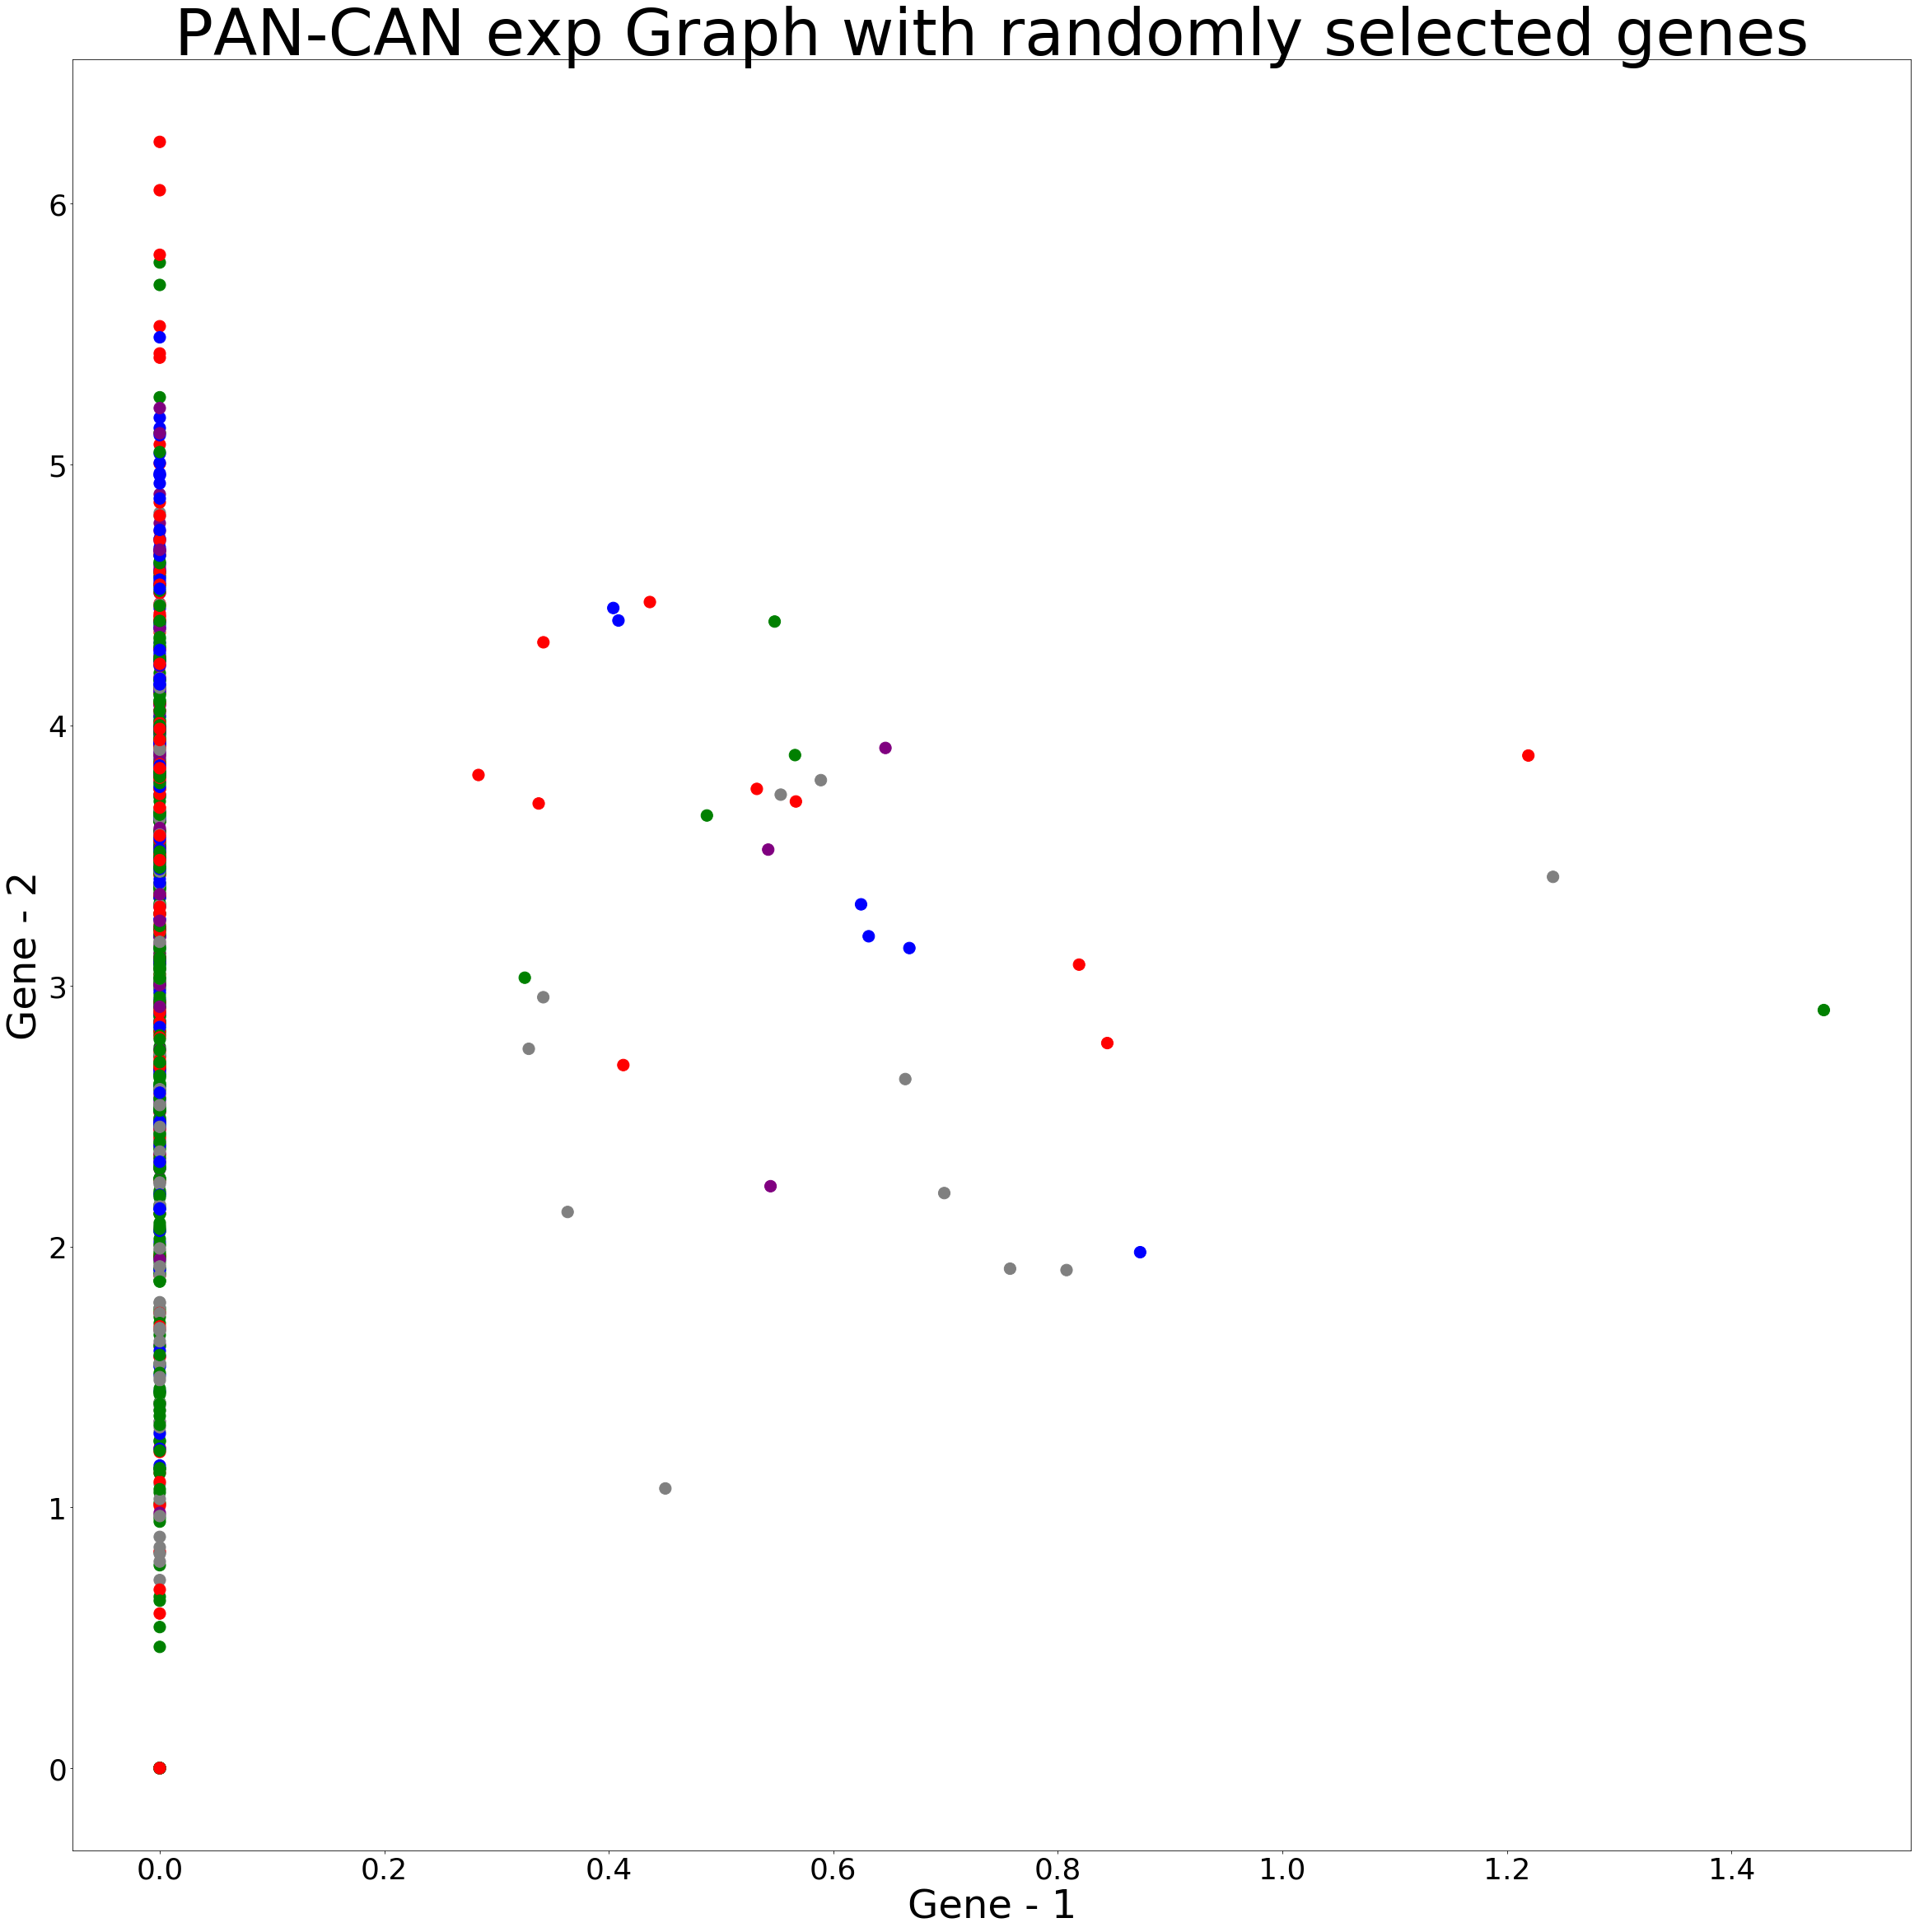

In [37]:
plt.figure(figsize=(40,40))
plt.scatter(sc_df[1], sc_df[2], c = colors, s = 200)
plt.title("PAN-CAN exp Graph with randomly selected genes", size = 78)
plt.xlabel('Gene - 1', size = 48)
plt.ylabel('Gene - 2', size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
#plt.annotate('See this separated cluster',xy=(90,25),xytext=(100,50),size=36, arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# PCA analysis with 30 components instead of 3

In [47]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

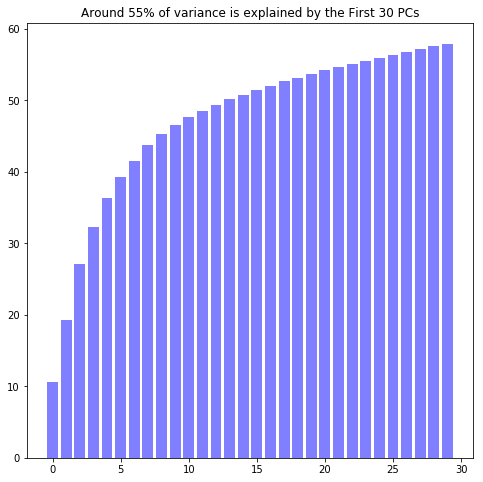

In [48]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 55% of variance is explained by the First 30 PCs");

In [49]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
pca_fit = sklearn_pca.fit(X_std)
Y_sklearn = sklearn_pca.transform(X_std)
per_var = np.round(sklearn_pca.explained_variance_ratio_*100, decimals = 1)
var_labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]


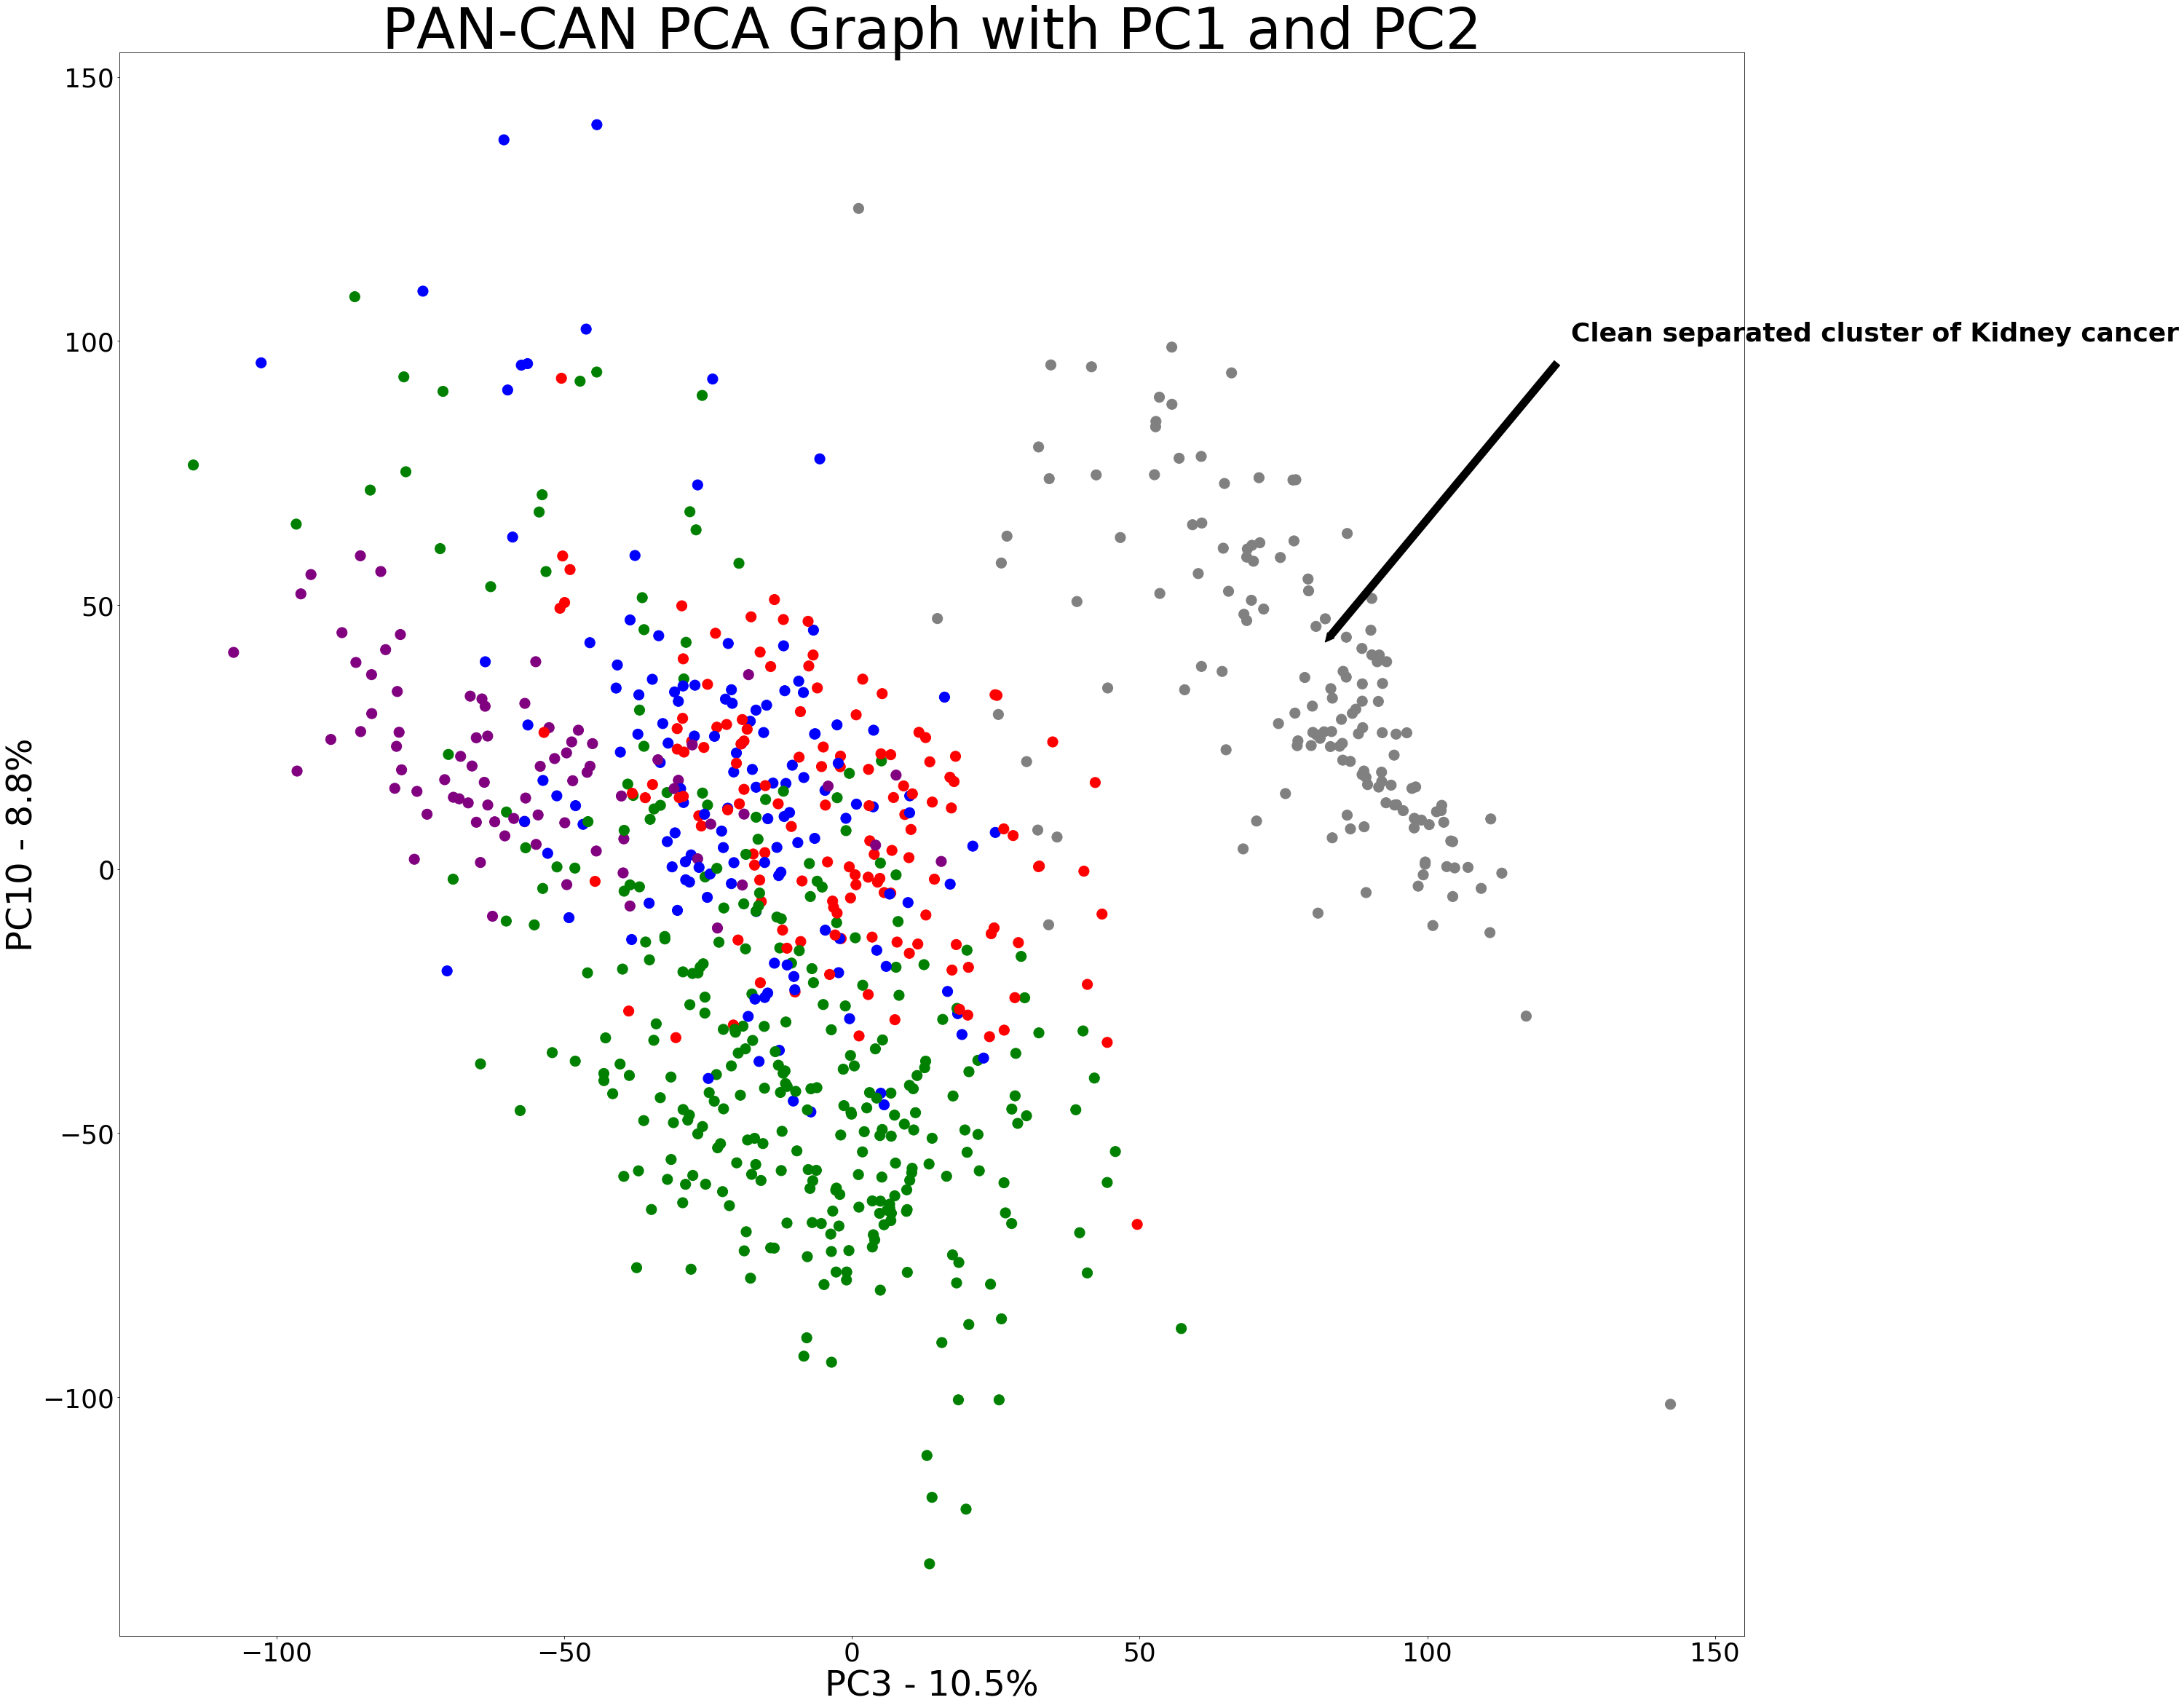

In [50]:
pca_30 = pd.DataFrame(Y_sklearn.astype(float), index = y, columns = var_labels)
plt.figure(figsize=(40,40))
plt.scatter(pca_30.PC1, pca_30.PC2, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC1 and PC2", size = 78)
plt.xlabel('PC3 - {0}%'.format(per_var[0]), size = 48)
plt.ylabel('PC10 - {0}%'.format(per_var[1]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of Kidney cancer',xy=(80,40), weight = 'heavy', xytext=(125,100),size=36, 
             arrowprops=dict(facecolor='black', width = 10, shrink=0.05))

plt.show()

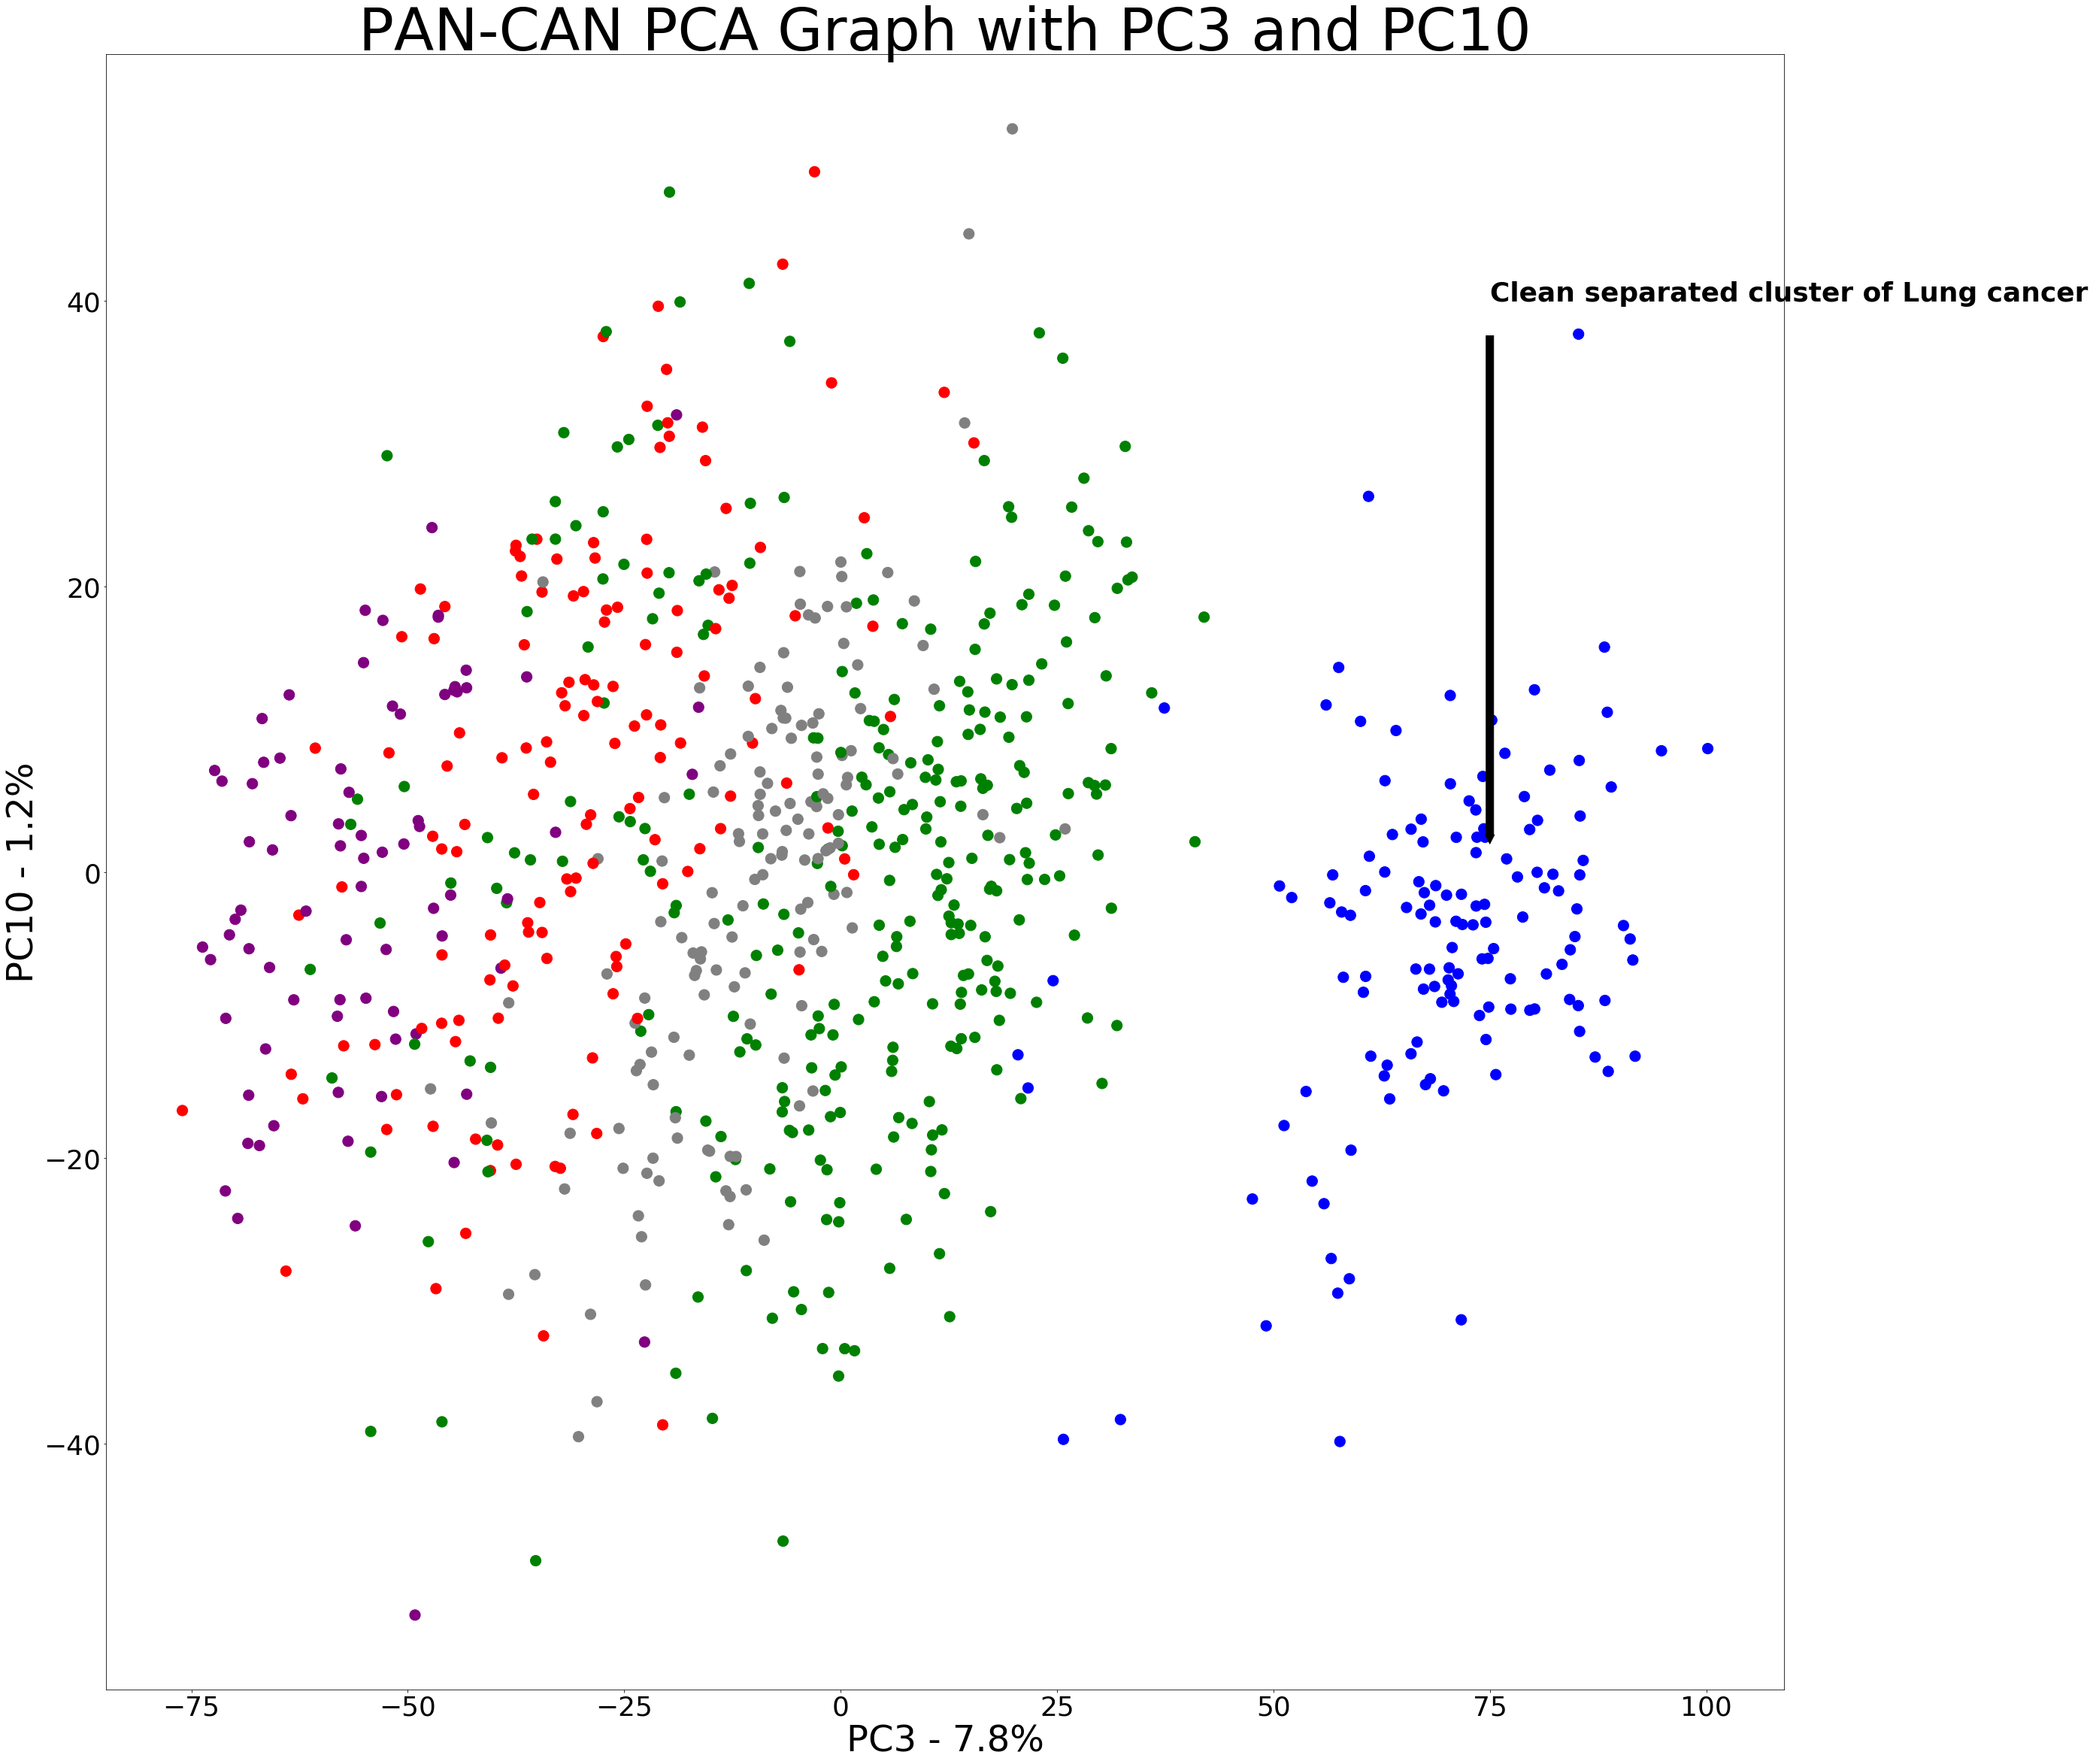

In [51]:
pca_30 = pd.DataFrame(Y_sklearn.astype(float), index = y, columns = var_labels)
plt.figure(figsize=(40,40))
plt.scatter(pca_30.PC3, pca_30.PC10, c = colors, s = 200)
plt.title("PAN-CAN PCA Graph with PC3 and PC10", size = 78)
plt.xlabel('PC3 - {0}%'.format(per_var[2]), size = 48)
plt.ylabel('PC10 - {0}%'.format(per_var[9]), size = 48)
plt.xticks(fontsize=36)
plt.yticks(fontsize = 36)
plt.annotate('Clean separated cluster of Lung cancer',xy=(75,0), weight = 'heavy', xytext=(75,40),size=36, 
             arrowprops=dict(facecolor='black', width = 10, shrink=0.05))

plt.show()

In [52]:
# PC3 and PC10 contain markers of Lung cancer while PC1 and PC2 contain markers of kidney cancer!

## t-SNE dimensionality reduction

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
# default iterations (1000) and perplexity (30)

In [54]:
X_2d = tsne.fit_transform(X)

In [55]:
# tsne_exp[:,1]

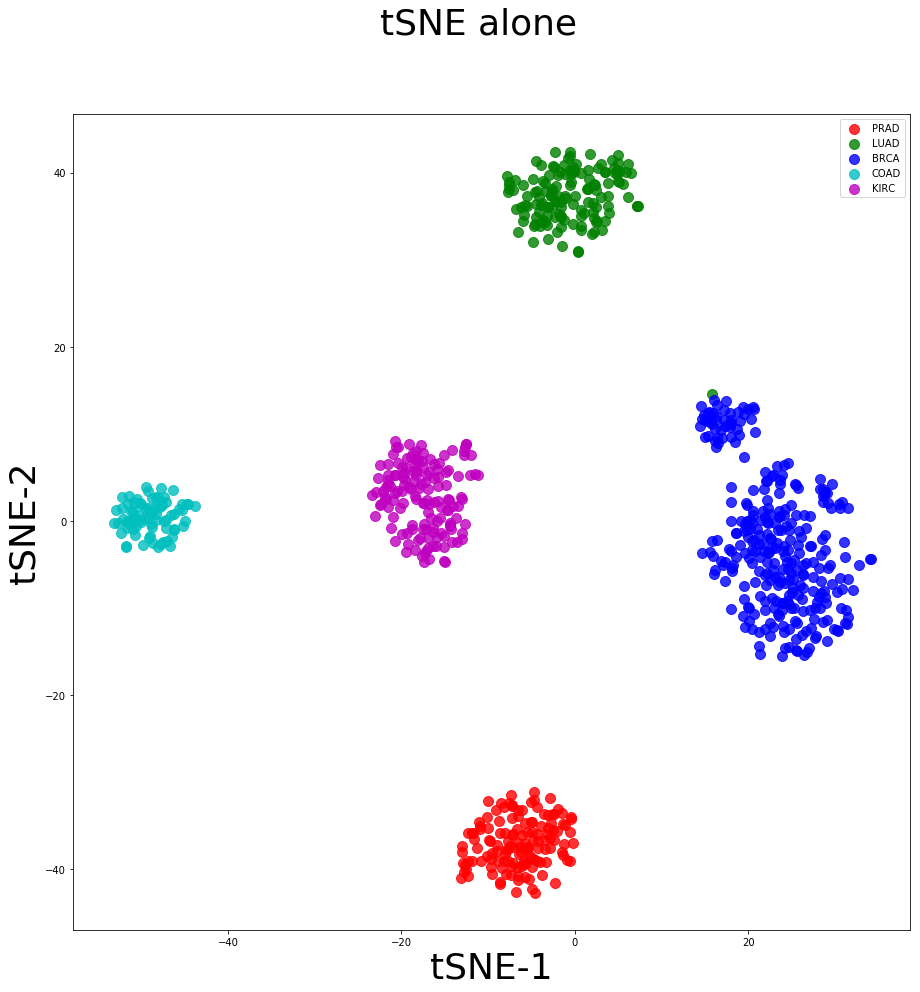

In [56]:
# tSNE plot with cancer cells labeled in individual colors
target_names = ['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC']
target_ids = range(len(y))

from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
color_ids = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_names, color_ids, target_names):
    #print(i)
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label, s = 100, alpha = 0.8)
plt.legend()
plt.suptitle('tSNE alone', size = 36)
plt.xlabel("tSNE-1", size = 36)
plt.ylabel("tSNE-2", size = 36)
plt.show()

In [57]:
# sns.clustermap(X_2d, figsize = (20, 20))

In [58]:
X_df = pd.DataFrame(X_2d) # convert tSNE to dataframe for input to clustermap with cancer correlation

{'PRAD': 'r', 'LUAD': 'g', 'BRCA': 'b', 'KIRC': 'm', 'COAD': 'c'}


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

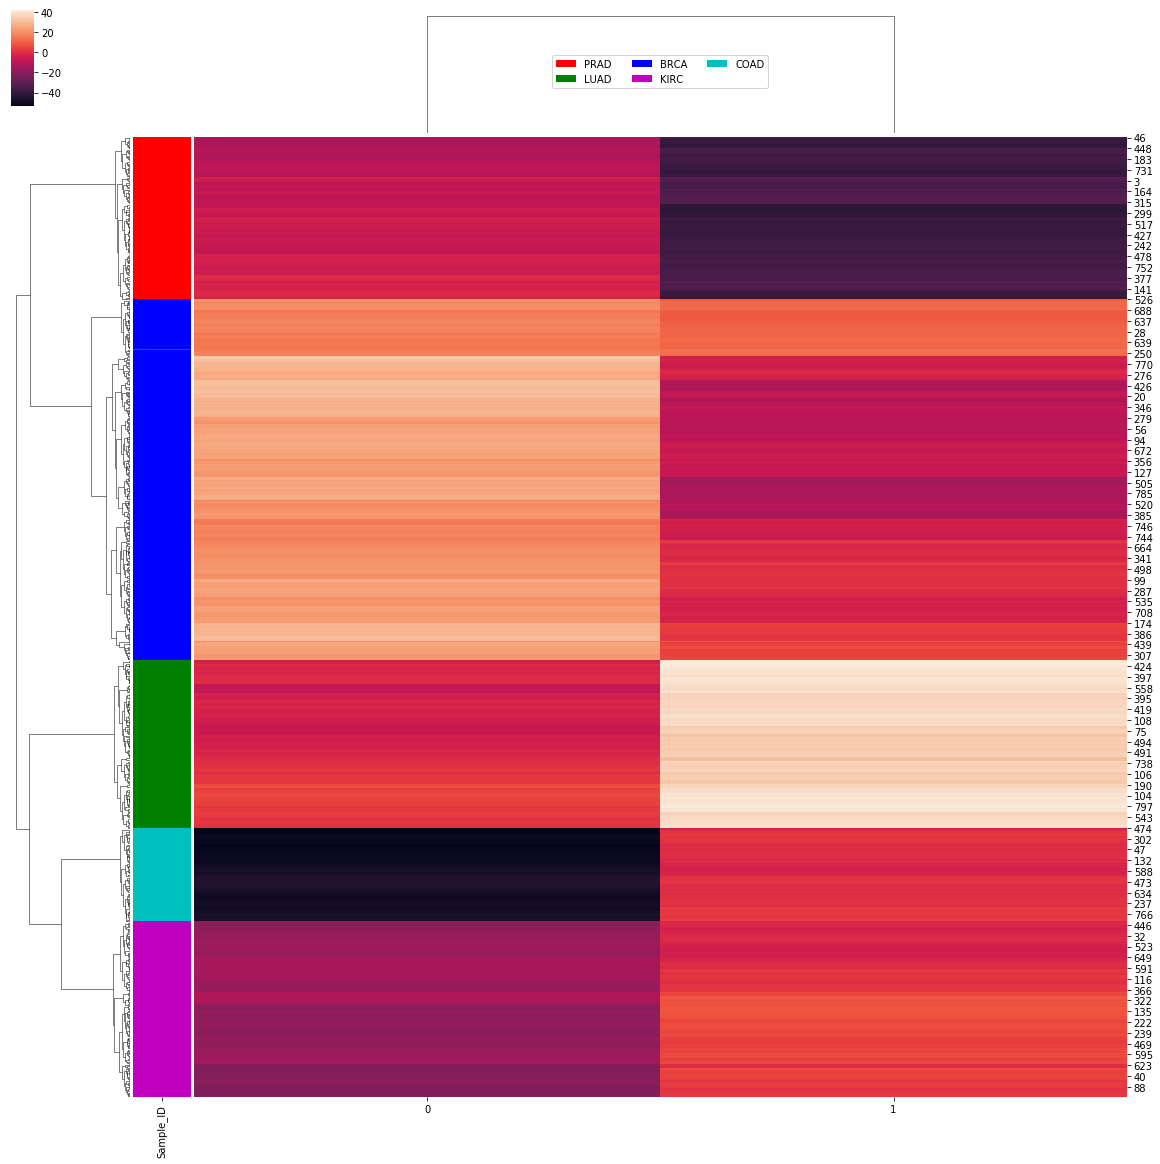

In [59]:
import matplotlib.patches as mpatches
lut = dict(zip(sc_df['Sample_ID'].unique(), "rgbmc")) # Dictionary with cancers and colors
print(lut)
row_colors = y.map(lut)
g = sns.clustermap(X_df, row_colors = row_colors, figsize = (20,20)) # Clustermap of gene expression data by tSNE
for (label, colour) in lut.items():
    # Make long label
    g.ax_col_dendrogram.bar(0, 0, color=colour, label=label)
g.ax_col_dendrogram.legend(loc="center", ncol=3) # includes cancer labels as legend
plt.tight_layout

## tSNE following PCA

In [60]:
pca_tsne = tsne.fit_transform(Y_sklearn)

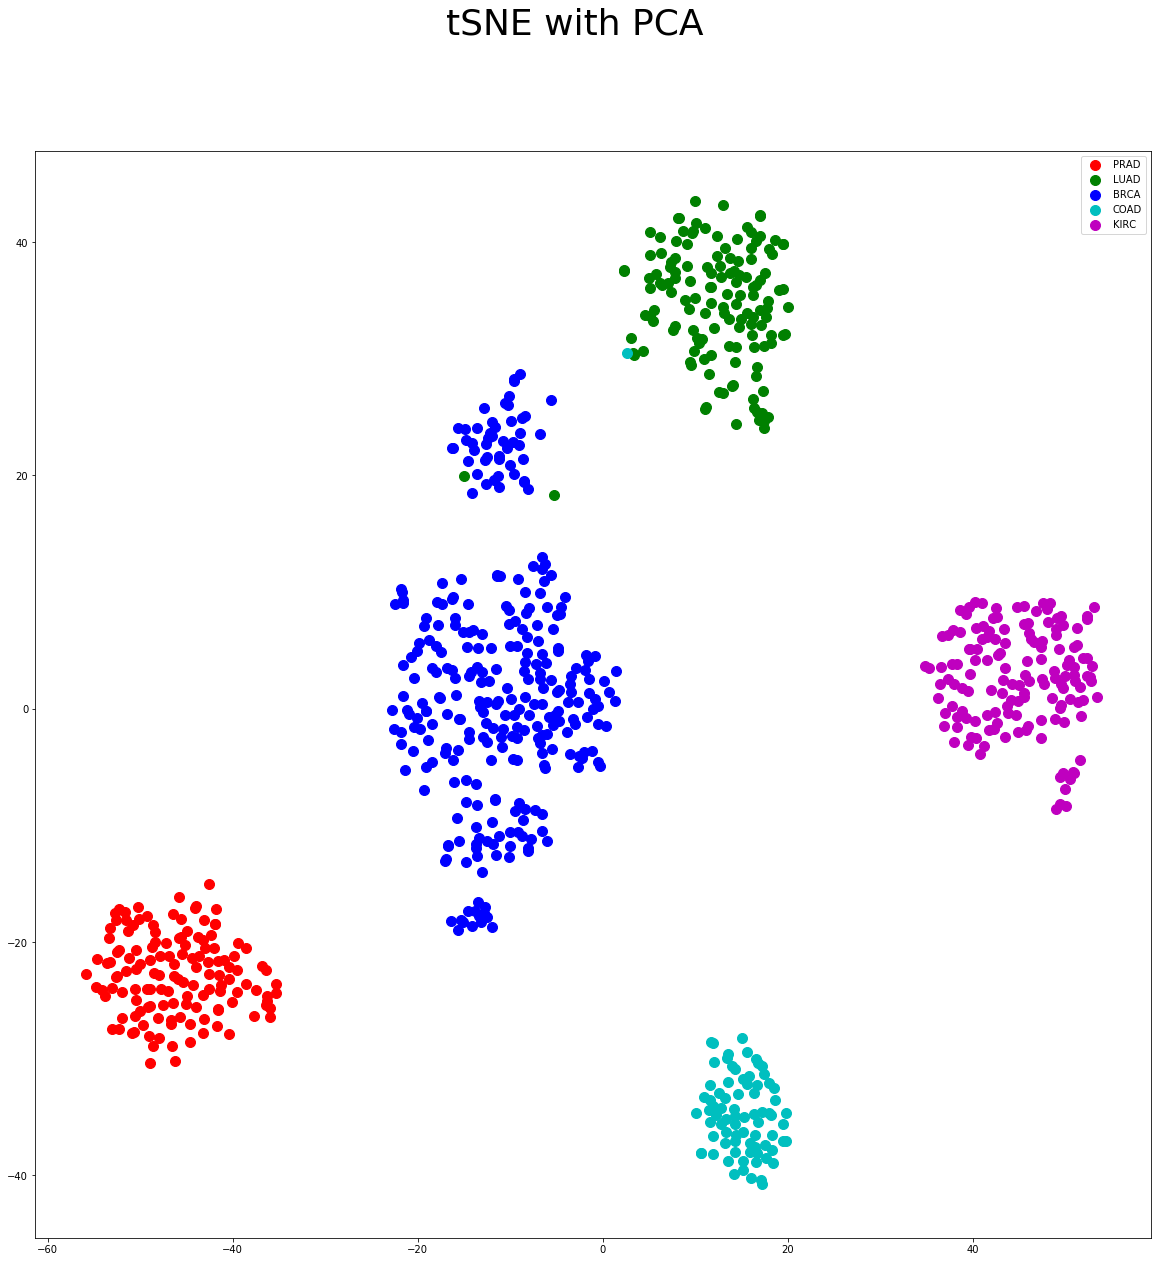

In [61]:
# tSNE plot with cancer cells labeled in individual colors
target_names = ['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC']
target_ids = range(len(y))

from matplotlib import pyplot as plt
plt.figure(figsize=(20, 20))
color_ids = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_names, color_ids, target_names):
    #print(i)
    plt.scatter(pca_tsne[y == i, 0], pca_tsne[y == i, 1], c=c, label=label, s = 100)
plt.legend()
plt.suptitle('tSNE with PCA', size = 36)
plt.show()

/Users/kirankocherlakota/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/kirankocherlakota/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


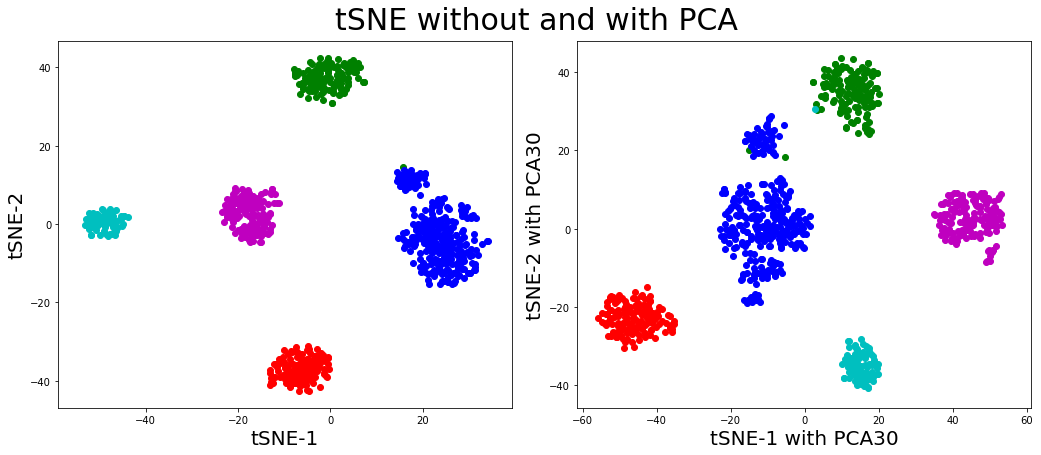

In [62]:
#fig = plt.figure()
fig, ax = plt.subplots(2, 1, figsize = (15,6))
fig.subplots_adjust(hspace = 2, wspace = 5)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
plt.subplot(1, 2, 1)
for i, c, label in zip(target_names, color_ids, target_names):
    #print(i)
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.subplot(1, 2, 2)
for i, c, label in zip(target_names, color_ids, target_names):
    #print(i)
    plt.scatter(pca_tsne[y == i, 0], pca_tsne[y == i, 1], c=c, label=label)
ax1.set_xlabel('tSNE-1', size = 20)
ax1.set_ylabel('tSNE-2', size =20)
ax2.set_xlabel('tSNE-1 with PCA30', size = 20)
ax2.set_ylabel('tSNE-2 with PCA30', size = 20)
plt.suptitle("tSNE without and with PCA", size = 30, va = "bottom", ha = "center")
fig.tight_layout()
plt.savefig('PanCan tSNE plots.png', dpi=300)
plt.show()


In [63]:
#tSNE with or without PCA does a good job of separating the clusters. 
# Without PCA is slightly better with only one error

In [92]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, 
             n_iter = 500)
tsne_moreiter = model.fit_transform(X)

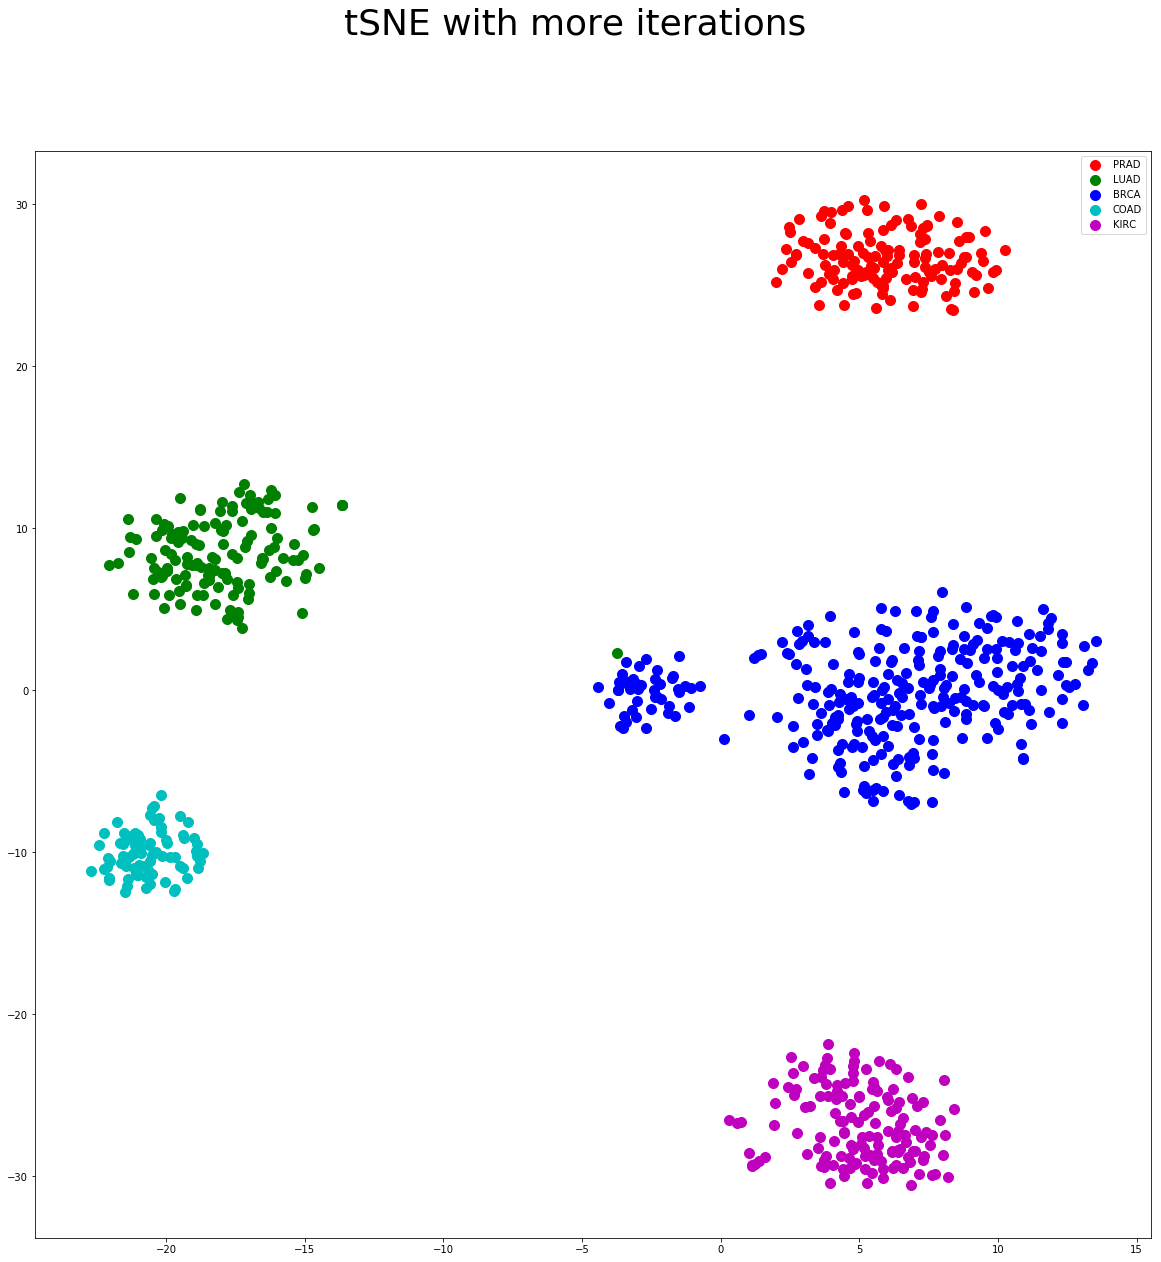

In [93]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 20))

for i, c, label in zip(target_names, color_ids, target_names):
    #print(i)
    plt.scatter(tsne_moreiter[y == i, 0], tsne_moreiter[y == i, 1], c=c, label=label, s = 100)
plt.legend()
plt.suptitle('tSNE with more iterations', size = 36)
plt.show()